In [31]:
import pandas as pd
import open3d as o3d
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# # Get a list of all CSV file paths in the directory
# csv_files = glob.glob("drone_flight_dataset_dedrone/*.csv")

# # Read each CSV file and concatenate the dataframes
# dfs = []
# for file in csv_files:
#     df = pd.read_csv(file)
#     dfs.append(df)

# # Concatenate all dataframes into a single dataframe
# df = pd.concat(dfs, ignore_index=True)

# read in drone_flight_dataset_dedrone/2023-05-01_00-00-00_clean.csv
df = pd.read_csv('drone_flight_dataset_dedrone/2023-05-01_00-00-00_clean.csv')

df['SensorTime'] = pd.to_datetime(df['SensorTime'], format='mixed')

# Get unique drone IDs
drone_ids = df['DroneId'].unique()

print(len(drone_ids))

# Loop through each drone ID and assign a flight number to each unique flight
for drone_id in drone_ids:
    # Filter the dataframe for the current drone ID
    filtered_df = df[df['DroneId'] == drone_id]

    # sort filtered_df by SensorTime
    filtered_df = filtered_df.sort_values('SensorTime')

    # Convert the SensorTime column to numpy array
    timestamps = filtered_df['SensorTime'].values

    # Calculate the time differences between consecutive timestamps
    time_diff = np.diff(timestamps)

    # Find the indices where the time difference is greater than 30 minutes
    split_indices = np.where(time_diff > np.timedelta64(20, 'm'))[0] + 1

    # Assign flight IDs based on the split indices
    flight_ids = np.zeros(len(timestamps), dtype=int)
    current_flight_id = 1
    for idx in split_indices:
        flight_ids[idx:] = current_flight_id
        current_flight_id += 1

    # Add the flight_ids column to the DataFrame
    filtered_df['FlightNum'] = flight_ids
    df.loc[filtered_df.index, 'FlightNum'] = filtered_df['FlightNum']

# Create a new column called UniqueFlightId by concatenating DroneId and FlightNum
df['UniqueFlightId'] = df['DroneId'] + '_' + df['FlightNum'].astype(int).astype(str)


1456


We now have unique flight paths. Filter out those with fewer than 100 points

count                              139
mean     2023-05-01 11:28:51.597122560
min                2023-05-01 11:27:21
25%                2023-05-01 11:28:23
50%                2023-05-01 11:28:55
75%         2023-05-01 11:29:27.500000
max                2023-05-01 11:30:00
Name: SensorTime, dtype: object


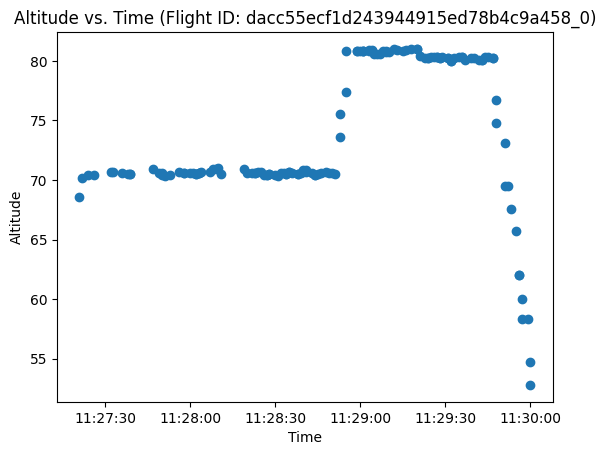

count                              197
mean     2023-05-01 11:20:42.817258752
min                2023-05-01 11:16:27
25%                2023-05-01 11:18:19
50%                2023-05-01 11:20:20
75%                2023-05-01 11:22:13
max                2023-05-01 11:27:19
Name: SensorTime, dtype: object


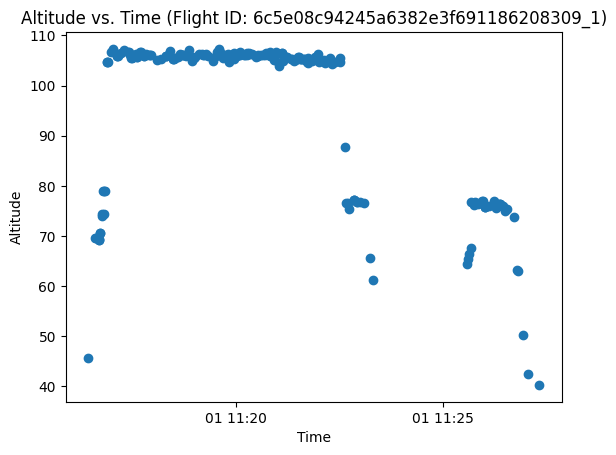

count                              126
mean     2023-05-01 09:08:45.325396480
min                2023-05-01 08:59:57
25%         2023-05-01 09:03:35.500000
50%                2023-05-01 09:06:33
75%      2023-05-01 09:16:24.249999872
max                2023-05-01 09:22:41
Name: SensorTime, dtype: object


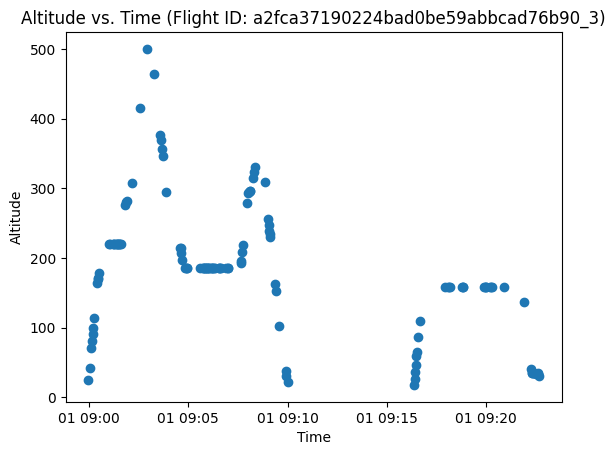

count                              140
mean     2023-05-01 09:17:06.192857344
min                2023-05-01 08:45:45
25%                2023-05-01 09:12:26
50%                2023-05-01 09:17:46
75%                2023-05-01 09:22:42
max                2023-05-01 09:38:44
Name: SensorTime, dtype: object


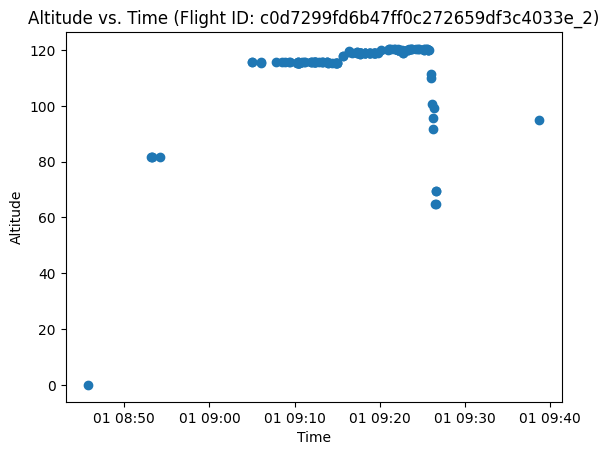

count                              283
mean     2023-05-01 07:15:22.749116416
min                2023-05-01 07:01:36
25%         2023-05-01 07:05:13.500000
50%                2023-05-01 07:08:42
75%                2023-05-01 07:28:09
max                2023-05-01 07:32:30
Name: SensorTime, dtype: object


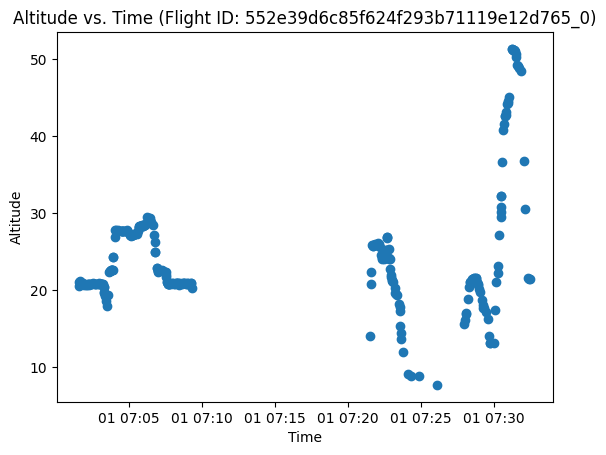

count                              222
mean     2023-05-01 05:03:15.265765632
min                2023-05-01 05:00:16
25%      2023-05-01 05:01:39.249999872
50%                2023-05-01 05:03:04
75%      2023-05-01 05:04:56.750000128
max                2023-05-01 05:06:39
Name: SensorTime, dtype: object


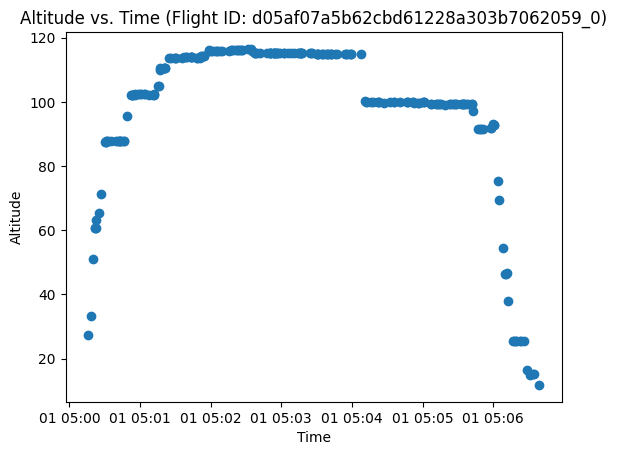

count                              246
mean     2023-05-01 11:34:06.048780288
min                2023-05-01 11:30:46
25%                2023-05-01 11:32:31
50%         2023-05-01 11:33:58.500000
75%         2023-05-01 11:35:30.500000
max                2023-05-01 11:42:20
Name: SensorTime, dtype: object


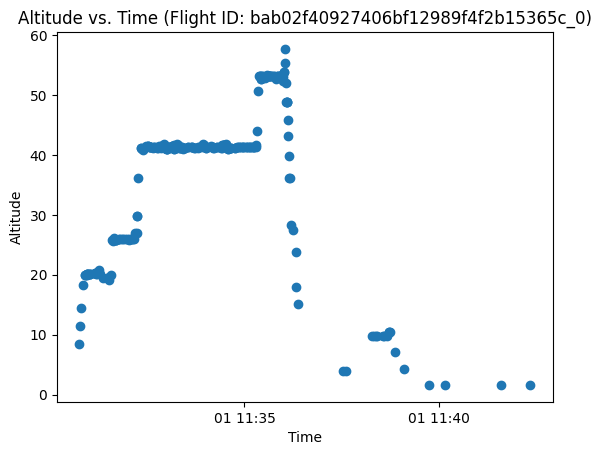

count                              196
mean     2023-05-01 08:21:20.566326784
min                2023-05-01 08:13:29
25%                2023-05-01 08:19:52
50%                2023-05-01 08:20:59
75%      2023-05-01 08:24:59.249999872
max                2023-05-01 08:26:15
Name: SensorTime, dtype: object


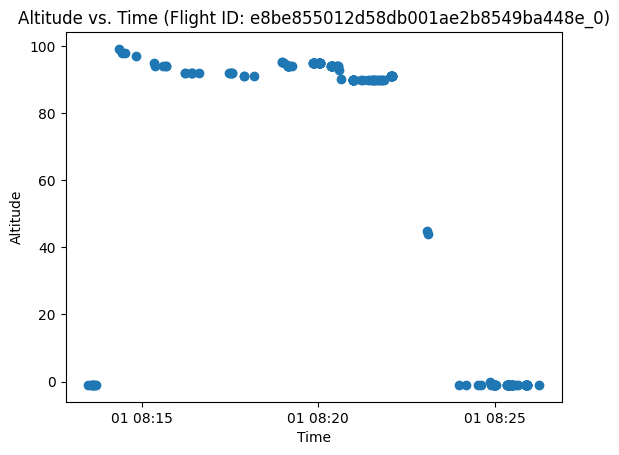

count                              109
mean     2023-05-01 08:20:05.577981952
min                2023-05-01 08:17:19
25%                2023-05-01 08:18:15
50%                2023-05-01 08:19:42
75%                2023-05-01 08:21:45
max                2023-05-01 08:23:56
Name: SensorTime, dtype: object


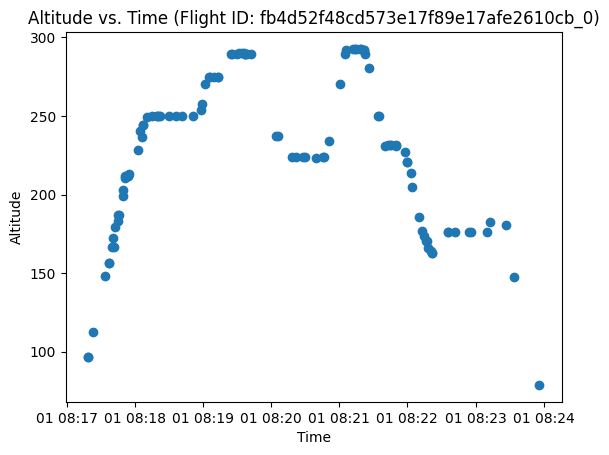

count                              234
mean     2023-05-01 11:51:44.452991744
min                2023-05-01 11:46:10
25%      2023-05-01 11:49:00.249999872
50%         2023-05-01 11:50:44.500000
75%                2023-05-01 11:54:45
max                2023-05-01 11:58:43
Name: SensorTime, dtype: object


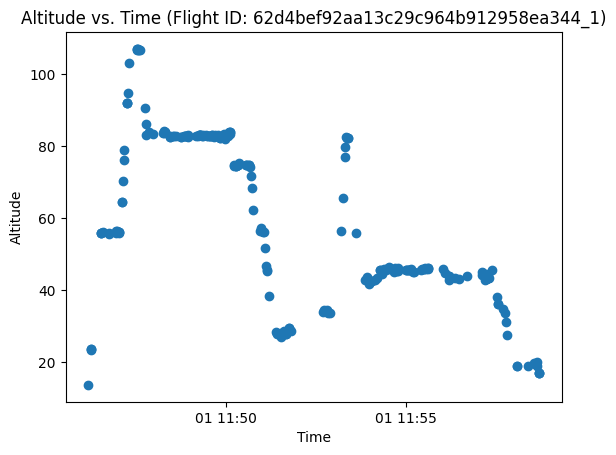

count                              176
mean     2023-05-01 09:40:09.744318464
min                2023-05-01 09:33:57
25%                2023-05-01 09:36:32
50%                2023-05-01 09:39:03
75%                2023-05-01 09:42:27
max                2023-05-01 09:50:18
Name: SensorTime, dtype: object


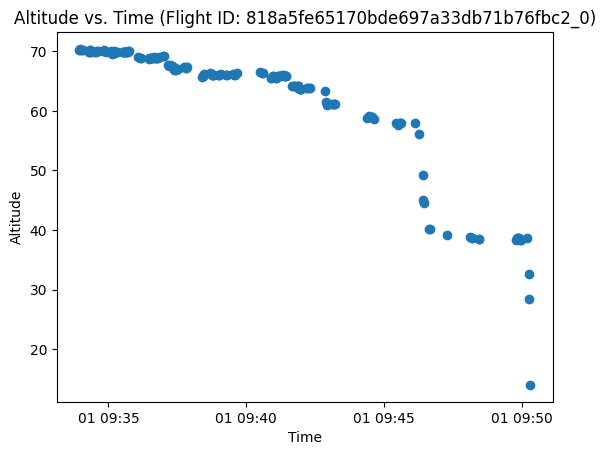

count                              246
mean     2023-05-01 10:33:15.158536448
min                2023-05-01 10:24:54
25%      2023-05-01 10:29:13.249999872
50%         2023-05-01 10:33:00.500000
75%         2023-05-01 10:36:45.500000
max                2023-05-01 10:41:14
Name: SensorTime, dtype: object


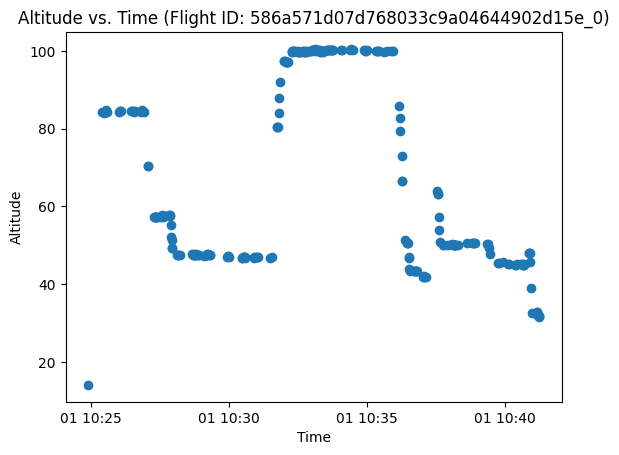

count                              530
mean     2023-05-01 07:19:11.511320832
min                2023-05-01 06:50:00
25%                2023-05-01 07:01:25
50%         2023-05-01 07:20:56.500000
75%      2023-05-01 07:34:12.750000128
max                2023-05-01 07:48:09
Name: SensorTime, dtype: object


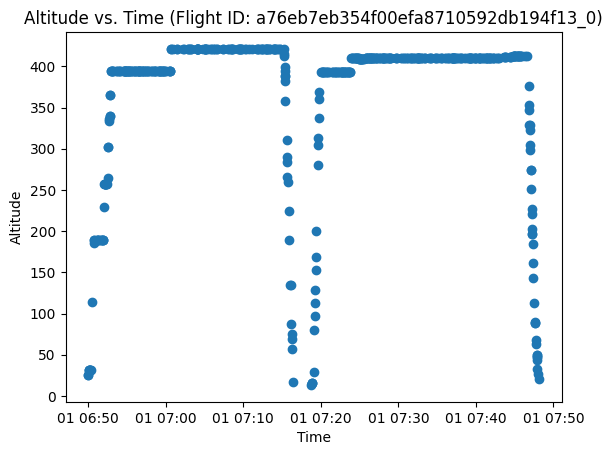

count                              110
mean     2023-05-01 08:01:28.727272192
min                2023-05-01 07:54:33
25%                2023-05-01 07:58:19
50%         2023-05-01 08:01:22.500000
75%      2023-05-01 08:04:58.750000128
max                2023-05-01 08:09:07
Name: SensorTime, dtype: object


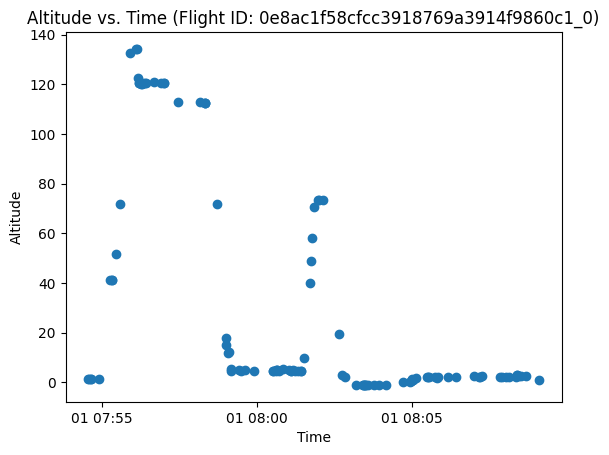

count                              701
mean     2023-05-01 10:07:51.482168064
min                2023-05-01 09:56:20
25%                2023-05-01 10:01:29
50%                2023-05-01 10:07:12
75%                2023-05-01 10:14:25
max                2023-05-01 10:19:16
Name: SensorTime, dtype: object


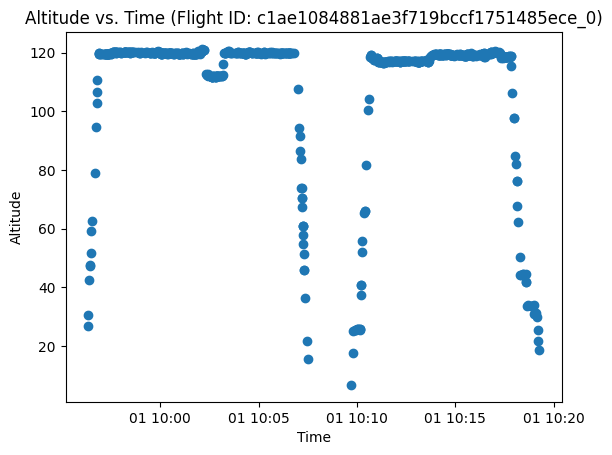

count                           375
mean     2023-05-01 11:06:07.024000
min             2023-05-01 11:00:46
25%      2023-05-01 11:03:29.500000
50%             2023-05-01 11:06:10
75%             2023-05-01 11:08:41
max             2023-05-01 11:11:24
Name: SensorTime, dtype: object


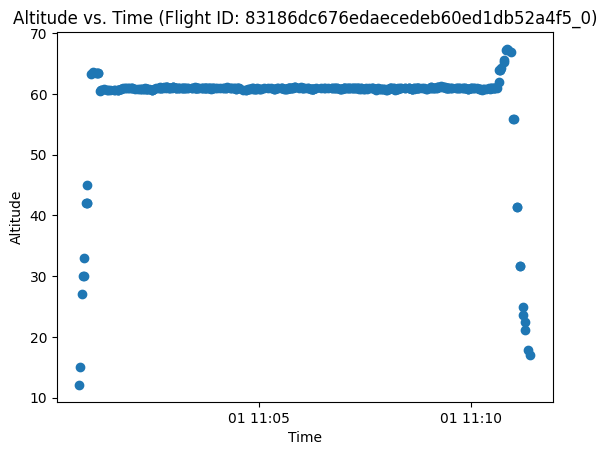

count                             2113
mean     2023-05-01 11:16:10.203975168
min                2023-05-01 10:56:45
25%                2023-05-01 11:04:15
50%                2023-05-01 11:11:30
75%                2023-05-01 11:27:34
max                2023-05-01 11:59:24
Name: SensorTime, dtype: object


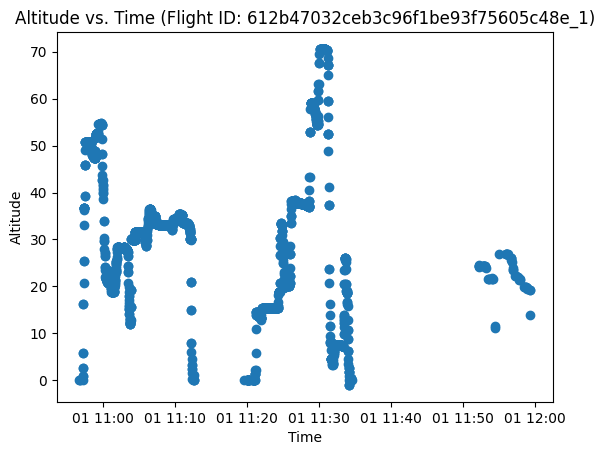

count                              246
mean     2023-05-01 09:17:25.154471424
min                2023-05-01 09:13:25
25%      2023-05-01 09:14:49.249999872
50%         2023-05-01 09:17:09.500000
75%                2023-05-01 09:19:10
max                2023-05-01 09:25:26
Name: SensorTime, dtype: object


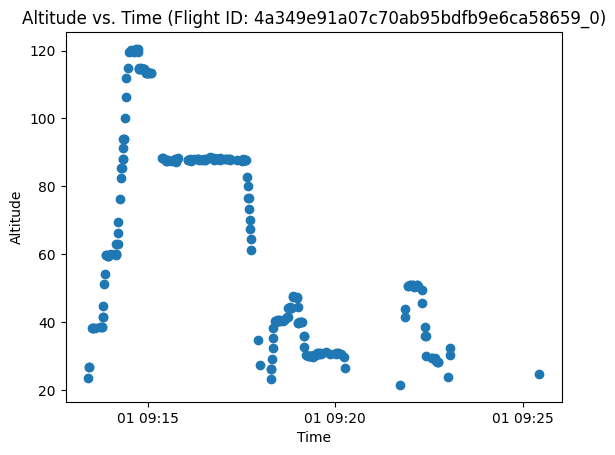

count                              199
mean     2023-05-01 12:02:50.502512640
min                2023-05-01 11:44:31
25%         2023-05-01 11:50:21.500000
50%                2023-05-01 12:01:38
75%                2023-05-01 12:16:02
max                2023-05-01 12:20:57
Name: SensorTime, dtype: object


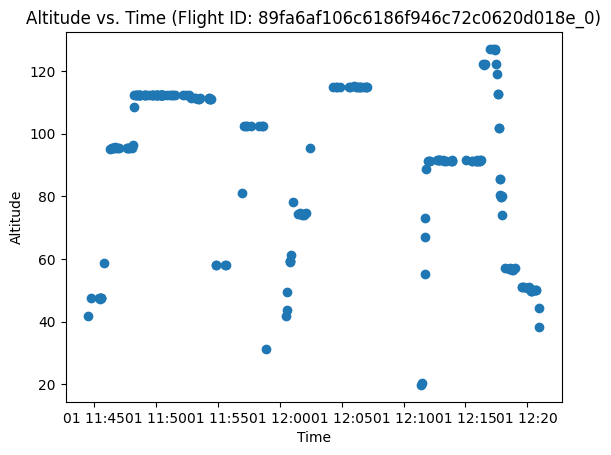

count                              424
mean     2023-05-01 10:30:57.441037824
min                2023-05-01 10:22:19
25%      2023-05-01 10:26:44.750000128
50%                2023-05-01 10:30:52
75%                2023-05-01 10:35:02
max                2023-05-01 10:39:06
Name: SensorTime, dtype: object


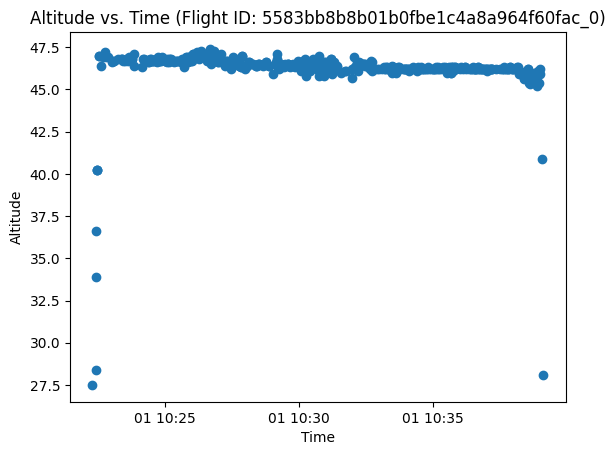

count                             2750
mean     2023-05-01 12:45:44.436727296
min                2023-05-01 11:08:02
25%         2023-05-01 11:54:31.500000
50%                2023-05-01 12:46:42
75%      2023-05-01 13:35:39.249999872
max                2023-05-01 14:28:50
Name: SensorTime, dtype: object


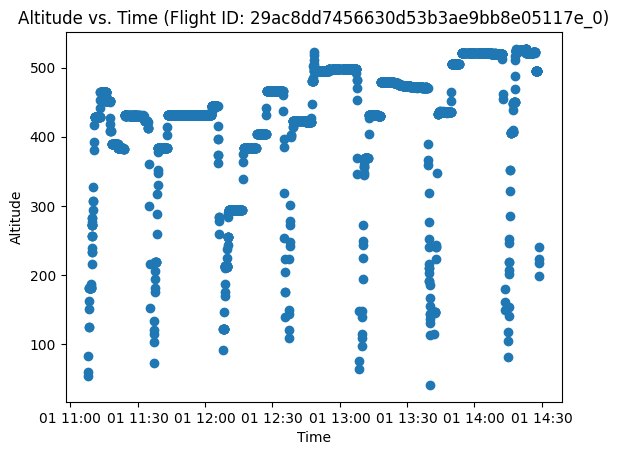

count                              194
mean     2023-05-01 10:44:03.103092736
min                2023-05-01 10:32:10
25%      2023-05-01 10:36:33.750000128
50%         2023-05-01 10:43:17.500000
75%         2023-05-01 10:52:05.500000
max                2023-05-01 11:02:04
Name: SensorTime, dtype: object


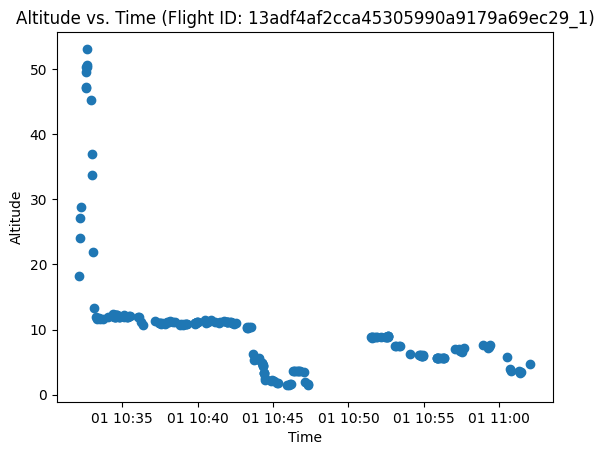

count                              120
mean     2023-05-01 09:41:20.650000128
min                2023-05-01 09:35:39
25%         2023-05-01 09:37:10.500000
50%         2023-05-01 09:38:08.500000
75%         2023-05-01 09:47:58.500000
max                2023-05-01 09:50:22
Name: SensorTime, dtype: object


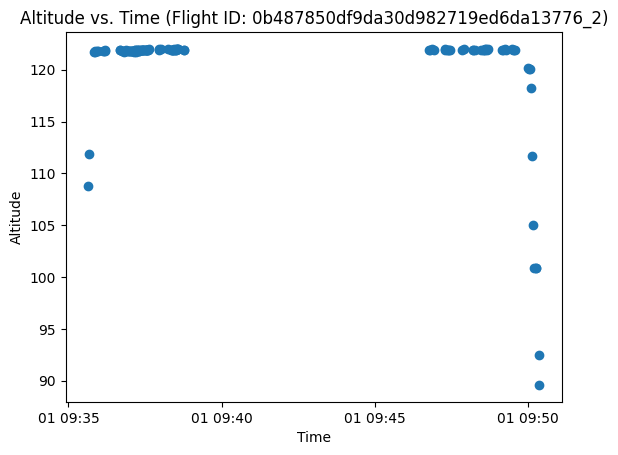

count                           400
mean     2023-05-01 06:31:30.800000
min             2023-05-01 05:25:03
25%             2023-05-01 06:05:17
50%      2023-05-01 06:22:24.500000
75%             2023-05-01 06:50:51
max             2023-05-01 08:01:41
Name: SensorTime, dtype: object


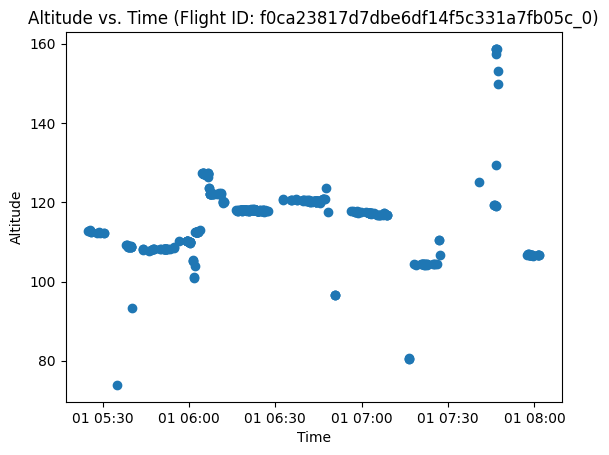

count                              160
mean     2023-05-01 08:45:41.931250176
min                2023-05-01 08:41:44
25%                2023-05-01 08:43:37
50%                2023-05-01 08:45:25
75%         2023-05-01 08:48:12.500000
max                2023-05-01 08:49:53
Name: SensorTime, dtype: object


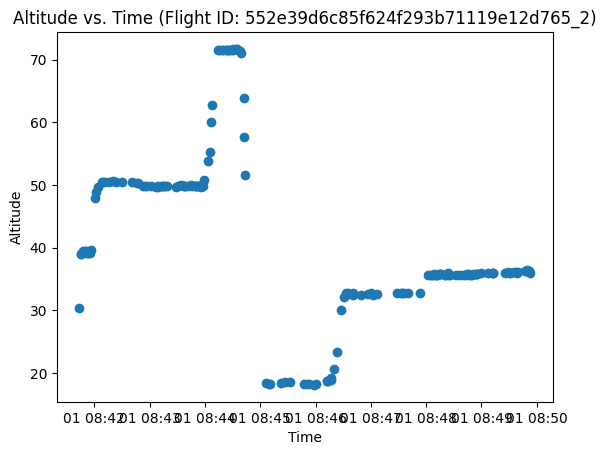

count                              137
mean     2023-05-01 09:03:25.686131456
min                2023-05-01 08:57:04
25%                2023-05-01 08:59:12
50%                2023-05-01 09:04:08
75%                2023-05-01 09:07:08
max                2023-05-01 09:08:19
Name: SensorTime, dtype: object


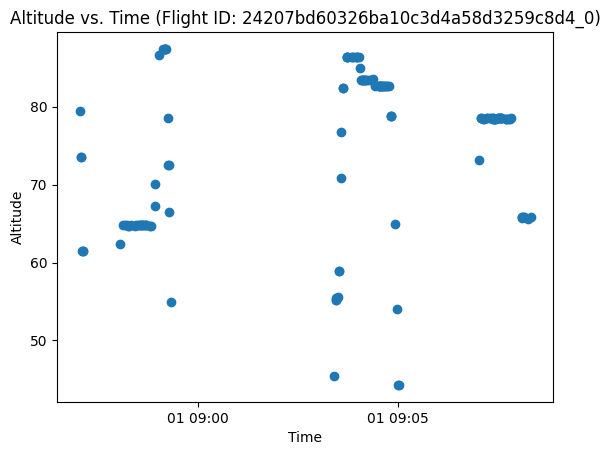

count                              378
mean     2023-05-01 12:07:39.595237888
min                2023-05-01 11:54:03
25%                2023-05-01 12:01:20
50%         2023-05-01 12:06:35.500000
75%                2023-05-01 12:13:13
max                2023-05-01 12:28:05
Name: SensorTime, dtype: object


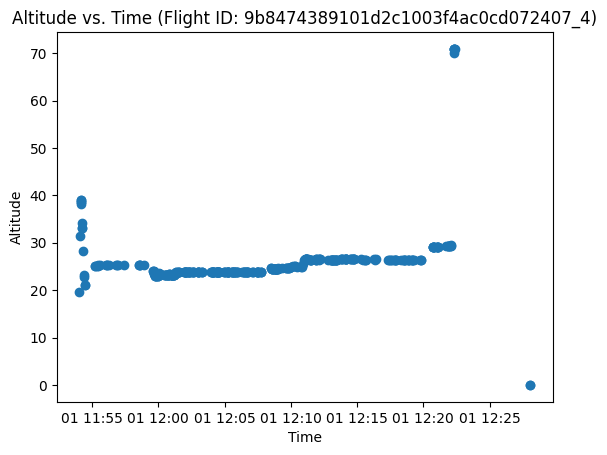

count                              277
mean     2023-05-01 11:20:53.584837632
min                2023-05-01 11:15:15
25%                2023-05-01 11:18:24
50%                2023-05-01 11:20:57
75%                2023-05-01 11:23:23
max                2023-05-01 11:25:58
Name: SensorTime, dtype: object


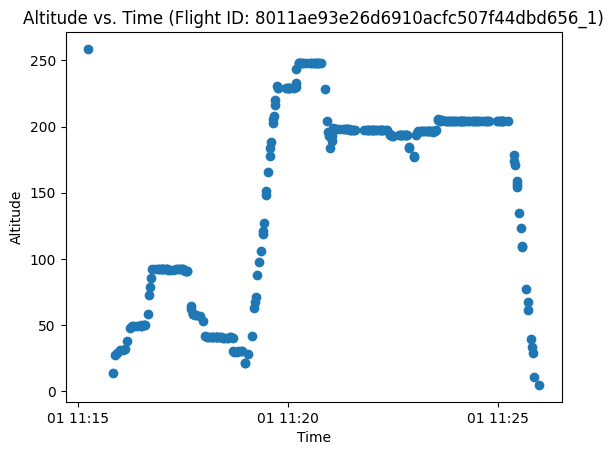

count                              403
mean     2023-05-01 10:56:15.600496128
min                2023-05-01 10:14:30
25%         2023-05-01 10:30:30.500000
50%                2023-05-01 10:58:47
75%                2023-05-01 11:22:07
max                2023-05-01 11:42:42
Name: SensorTime, dtype: object


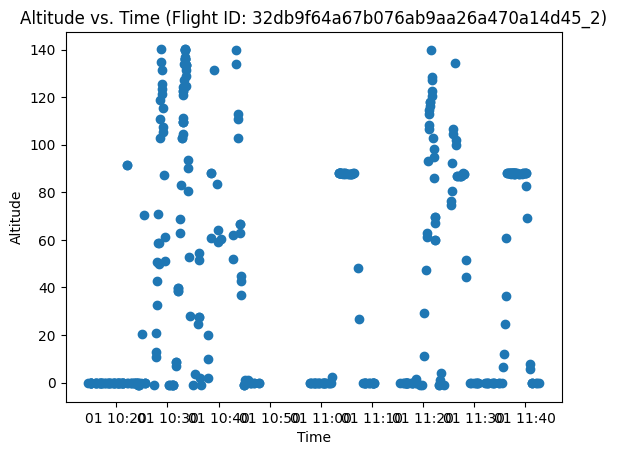

count                              180
mean     2023-05-01 10:43:06.816666624
min                2023-05-01 10:40:02
25%         2023-05-01 10:41:55.500000
50%                2023-05-01 10:42:43
75%                2023-05-01 10:43:50
max                2023-05-01 10:49:06
Name: SensorTime, dtype: object


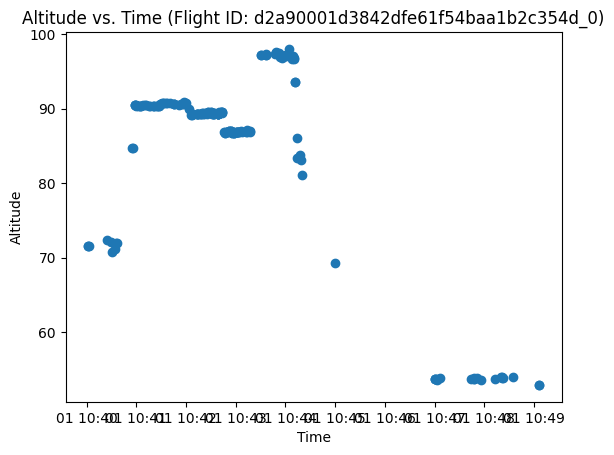

count                              134
mean     2023-05-01 12:19:01.985074688
min                2023-05-01 11:50:12
25%      2023-05-01 12:08:18.750000128
50%         2023-05-01 12:22:42.500000
75%      2023-05-01 12:29:08.750000128
max                2023-05-01 12:37:20
Name: SensorTime, dtype: object


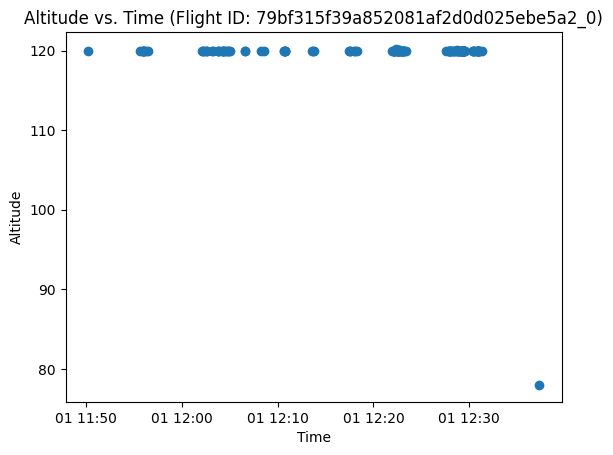

count                              554
mean     2023-05-01 04:35:36.601083136
min                2023-05-01 04:24:50
25%      2023-05-01 04:30:35.750000128
50%                2023-05-01 04:35:35
75%                2023-05-01 04:40:31
max                2023-05-01 04:45:25
Name: SensorTime, dtype: object


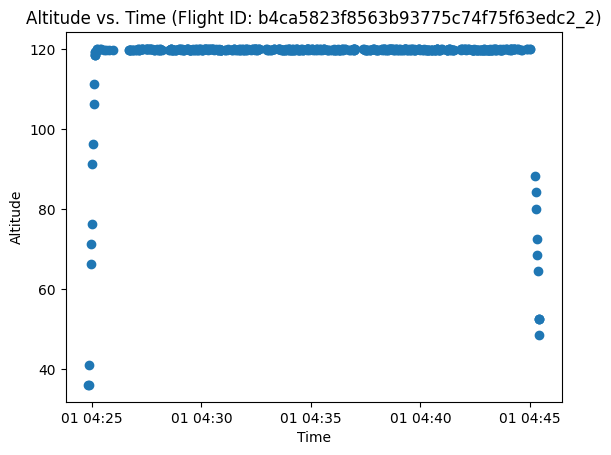

count                              330
mean     2023-05-01 11:37:40.775757568
min                2023-05-01 11:24:15
25%                2023-05-01 11:27:14
50%         2023-05-01 11:29:38.500000
75%      2023-05-01 11:49:08.750000128
max                2023-05-01 11:55:15
Name: SensorTime, dtype: object


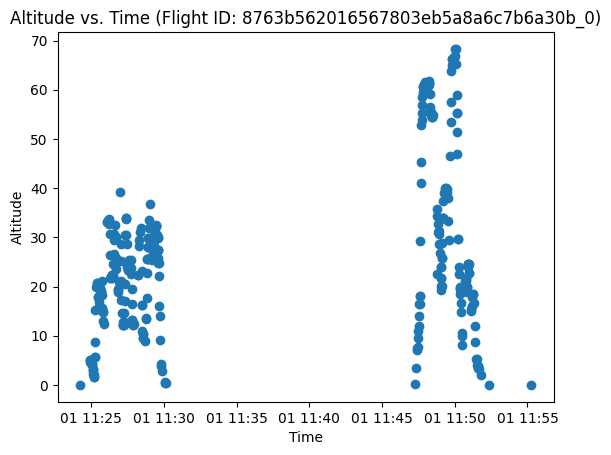

count                             1408
mean     2023-05-01 07:04:38.081676032
min                2023-05-01 06:47:09
25%      2023-05-01 06:55:40.249999872
50%         2023-05-01 07:04:31.500000
75%                2023-05-01 07:13:34
max                2023-05-01 07:28:17
Name: SensorTime, dtype: object


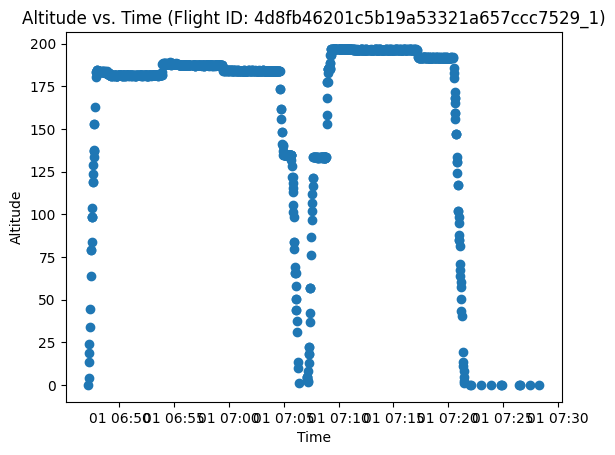

count                              164
mean     2023-05-01 11:50:35.402438912
min                2023-05-01 11:42:11
25%      2023-05-01 11:45:07.249999872
50%         2023-05-01 11:46:49.500000
75%                2023-05-01 11:52:47
max                2023-05-01 12:10:01
Name: SensorTime, dtype: object


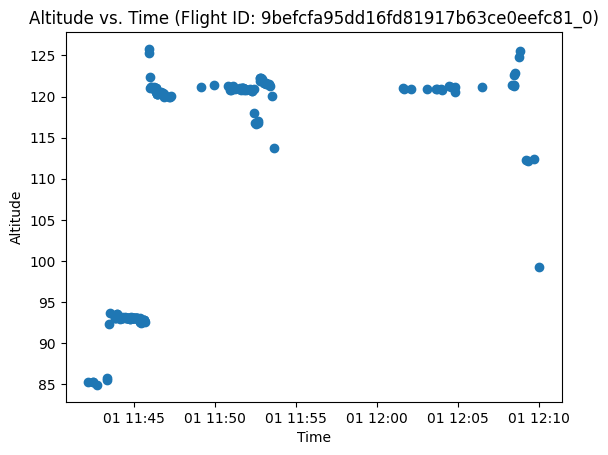

count                              287
mean     2023-05-01 08:42:48.581881344
min                2023-05-01 08:37:43
25%                2023-05-01 08:40:47
50%                2023-05-01 08:42:53
75%         2023-05-01 08:44:50.500000
max                2023-05-01 08:47:16
Name: SensorTime, dtype: object


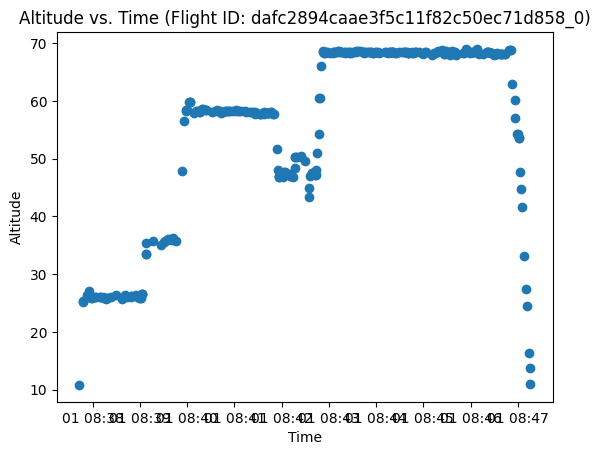

count                              105
mean     2023-05-01 10:57:52.533333248
min                2023-05-01 10:54:20
25%                2023-05-01 10:56:23
50%                2023-05-01 10:58:09
75%                2023-05-01 10:59:19
max                2023-05-01 11:00:30
Name: SensorTime, dtype: object


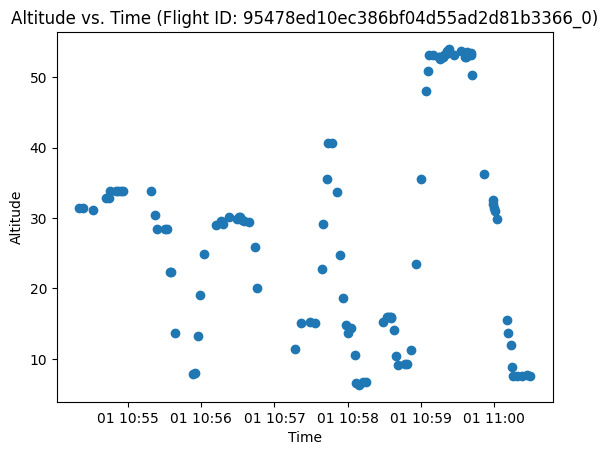

count                              768
mean     2023-05-01 07:38:12.740885504
min                2023-05-01 07:21:25
25%         2023-05-01 07:27:28.500000
50%                2023-05-01 07:34:22
75%                2023-05-01 07:50:01
max                2023-05-01 08:01:07
Name: SensorTime, dtype: object


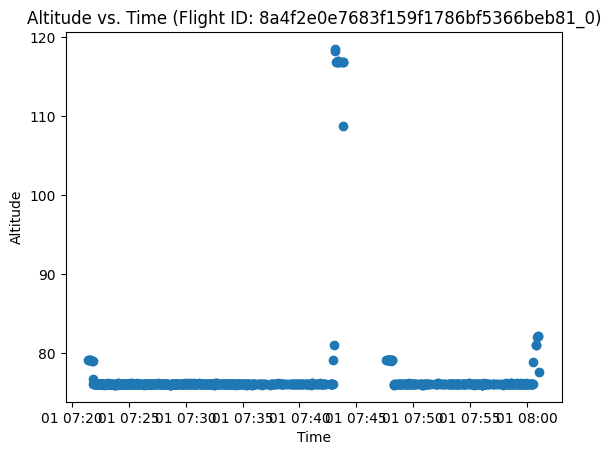

count                              470
mean     2023-05-01 09:22:24.104255488
min                2023-05-01 09:05:30
25%                2023-05-01 09:18:40
50%         2023-05-01 09:24:55.500000
75%                2023-05-01 09:27:21
max                2023-05-01 09:30:15
Name: SensorTime, dtype: object


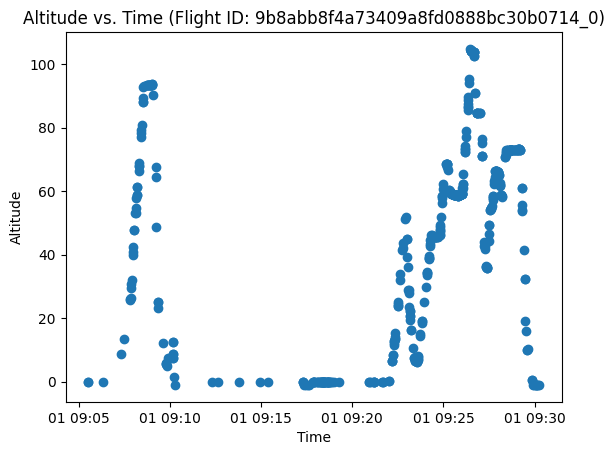

count                              190
mean     2023-05-01 08:47:24.684210432
min                2023-05-01 08:44:27
25%                2023-05-01 08:45:22
50%         2023-05-01 08:47:30.500000
75%                2023-05-01 08:49:23
max                2023-05-01 08:50:54
Name: SensorTime, dtype: object


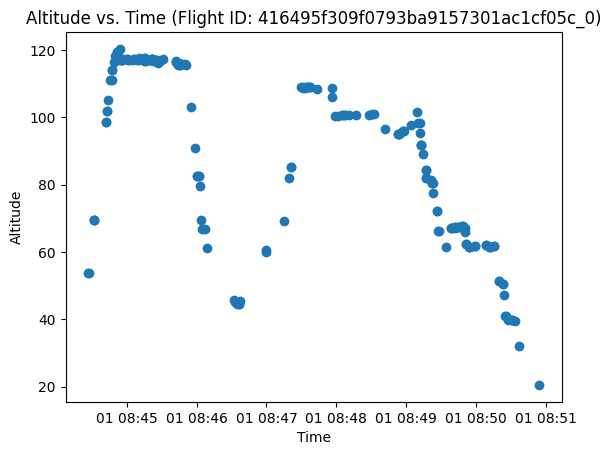

count                             1012
mean     2023-05-01 10:58:19.729249024
min                2023-05-01 10:05:14
25%                2023-05-01 10:49:58
50%         2023-05-01 10:58:11.500000
75%                2023-05-01 11:08:26
max                2023-05-01 11:17:21
Name: SensorTime, dtype: object


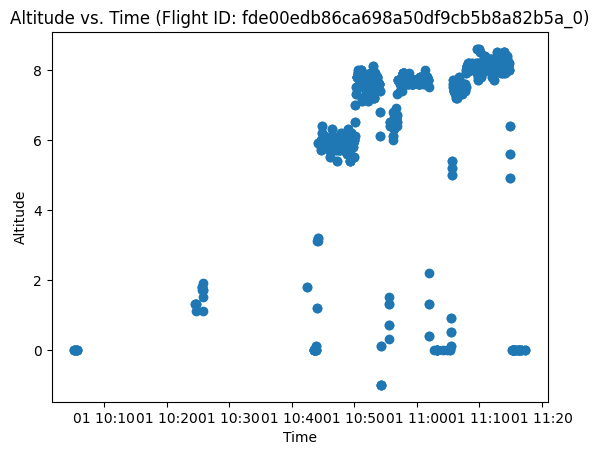

count                              179
mean     2023-05-01 05:51:40.955306752
min                2023-05-01 05:45:55
25%                2023-05-01 05:50:19
50%                2023-05-01 05:51:57
75%                2023-05-01 05:52:54
max                2023-05-01 05:54:55
Name: SensorTime, dtype: object


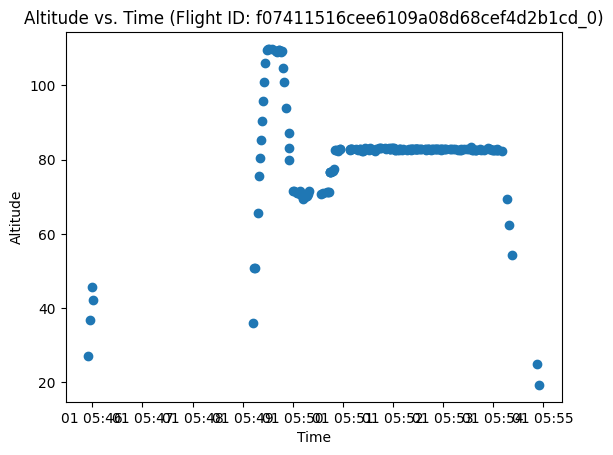

count                              123
mean     2023-05-01 07:57:06.138211584
min                2023-05-01 07:55:07
25%                2023-05-01 07:56:27
50%                2023-05-01 07:57:09
75%         2023-05-01 07:57:51.500000
max                2023-05-01 07:59:04
Name: SensorTime, dtype: object


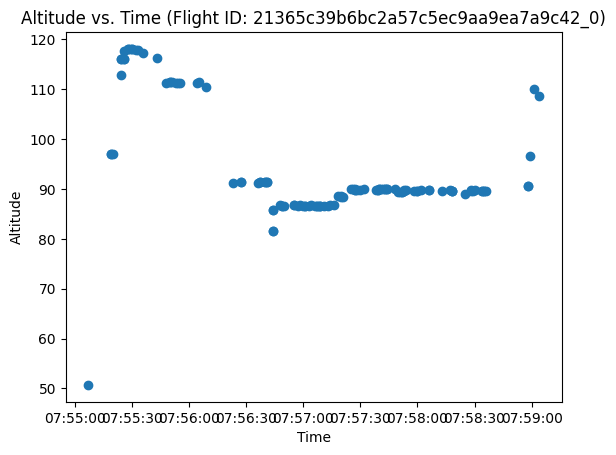

count                              471
mean     2023-05-01 10:47:01.203821568
min                2023-05-01 10:22:01
25%                2023-05-01 10:41:29
50%                2023-05-01 10:48:47
75%         2023-05-01 10:58:12.500000
max                2023-05-01 11:02:44
Name: SensorTime, dtype: object


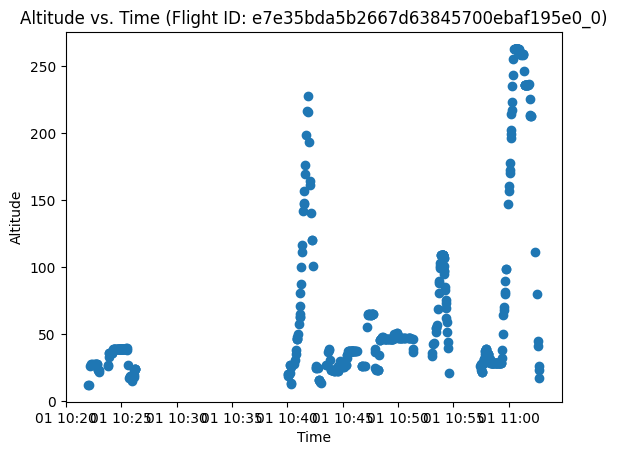

count                              103
mean     2023-05-01 11:39:59.281553408
min                2023-05-01 11:35:44
25%                2023-05-01 11:36:28
50%                2023-05-01 11:38:17
75%                2023-05-01 11:42:41
max                2023-05-01 11:48:24
Name: SensorTime, dtype: object


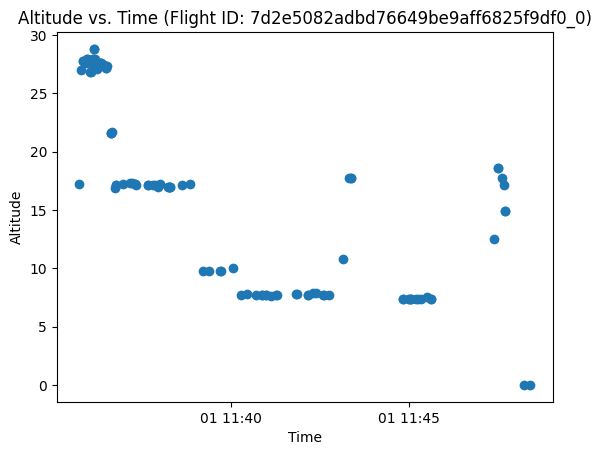

count                              342
mean     2023-05-01 08:25:54.538011648
min                2023-05-01 08:16:06
25%         2023-05-01 08:20:11.500000
50%                2023-05-01 08:25:39
75%      2023-05-01 08:31:27.750000128
max                2023-05-01 08:37:20
Name: SensorTime, dtype: object


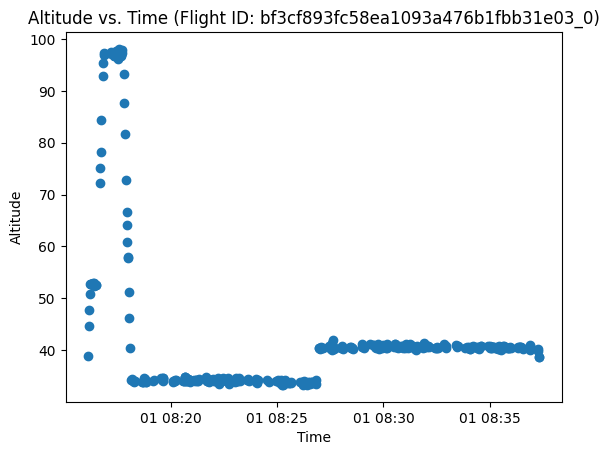

count                              388
mean     2023-05-01 10:52:15.149484800
min                2023-05-01 10:34:39
25%         2023-05-01 10:41:43.500000
50%         2023-05-01 10:58:26.500000
75%                2023-05-01 11:01:57
max                2023-05-01 11:08:19
Name: SensorTime, dtype: object


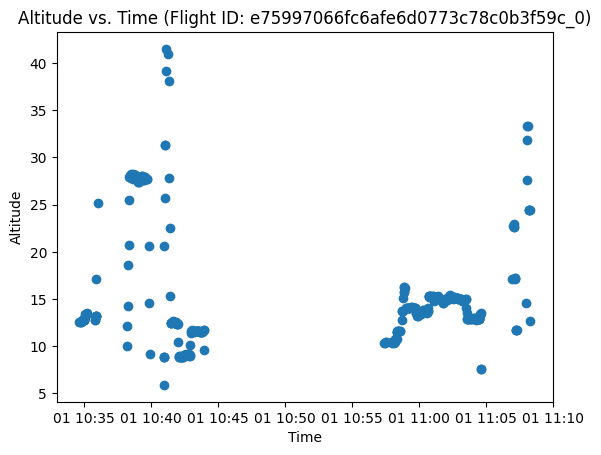

count                              230
mean     2023-05-01 06:22:57.752173568
min                2023-05-01 06:05:52
25%         2023-05-01 06:12:52.500000
50%                2023-05-01 06:24:30
75%      2023-05-01 06:32:28.249999872
max                2023-05-01 06:38:03
Name: SensorTime, dtype: object


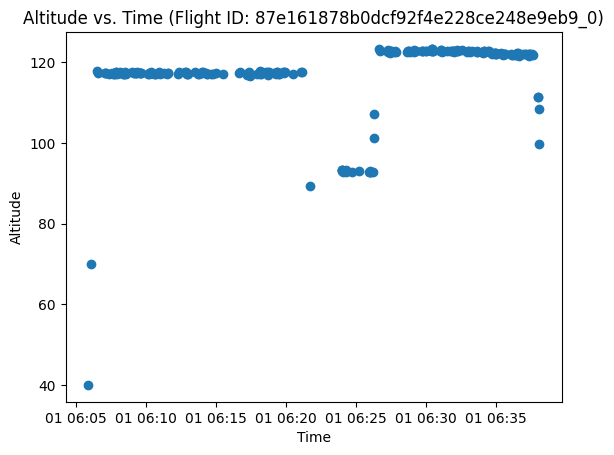

count                              222
mean     2023-05-01 06:59:42.067567616
min                2023-05-01 06:47:43
25%      2023-05-01 06:53:06.249999872
50%         2023-05-01 06:55:08.500000
75%         2023-05-01 06:59:09.500000
max                2023-05-01 07:22:24
Name: SensorTime, dtype: object


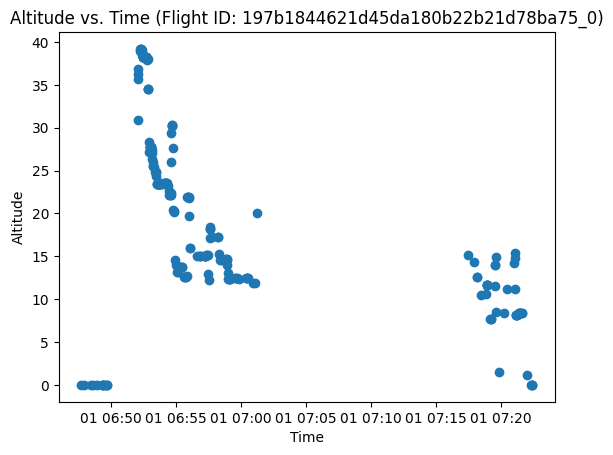

count                              163
mean     2023-05-01 04:02:48.061349632
min                2023-05-01 03:32:36
25%         2023-05-01 03:39:46.500000
50%                2023-05-01 03:55:33
75%                2023-05-01 04:25:49
max                2023-05-01 04:52:15
Name: SensorTime, dtype: object


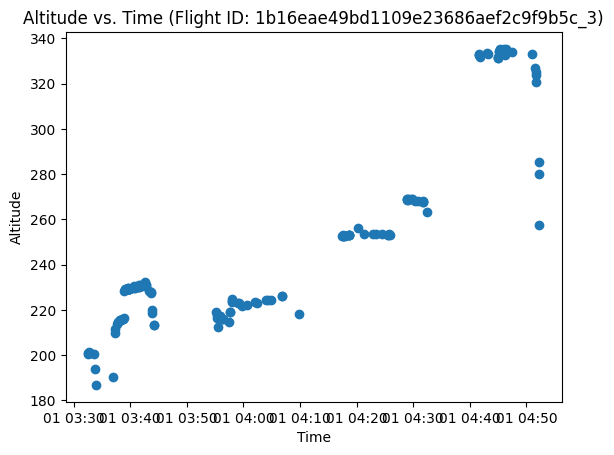

count                              229
mean     2023-05-01 05:29:44.393013248
min                2023-05-01 04:49:15
25%                2023-05-01 05:09:21
50%                2023-05-01 05:25:43
75%                2023-05-01 05:38:03
max                2023-05-01 06:45:27
Name: SensorTime, dtype: object


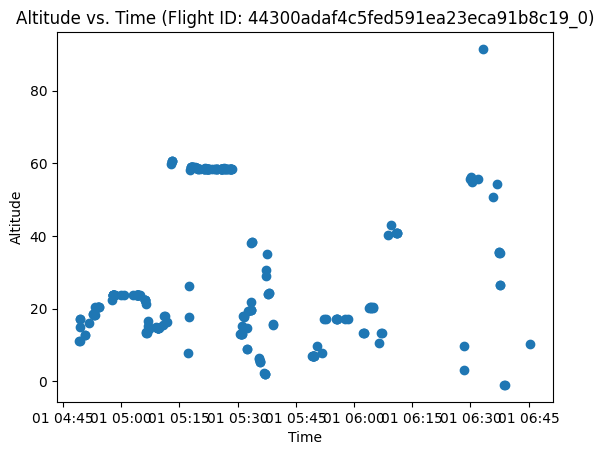

count                             1038
mean     2023-05-01 05:27:37.715799552
min                2023-05-01 04:35:02
25%                2023-05-01 05:04:43
50%                2023-05-01 05:32:41
75%      2023-05-01 05:52:31.249999872
max                2023-05-01 06:12:58
Name: SensorTime, dtype: object


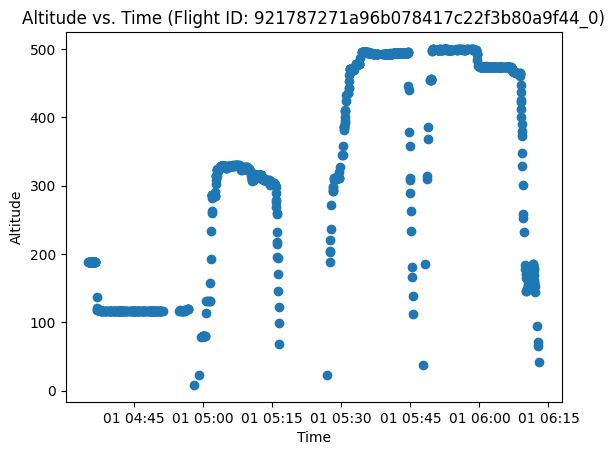

count                              113
mean     2023-05-01 09:01:56.274336256
min                2023-05-01 08:52:59
25%                2023-05-01 08:58:03
50%                2023-05-01 09:02:22
75%                2023-05-01 09:05:56
max                2023-05-01 09:10:43
Name: SensorTime, dtype: object


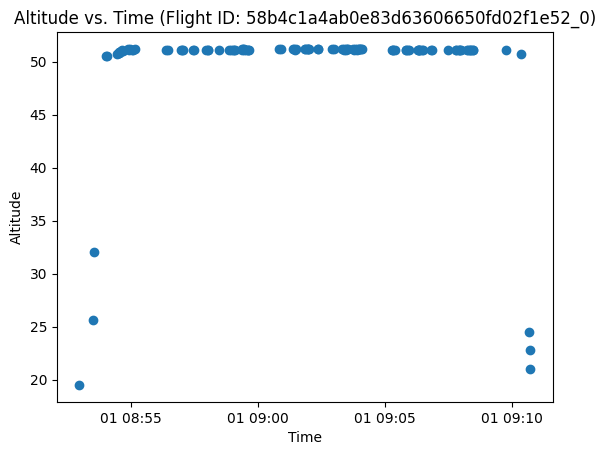

count                              516
mean     2023-05-01 06:12:35.281007616
min                2023-05-01 06:06:01
25%                2023-05-01 06:09:10
50%                2023-05-01 06:12:46
75%                2023-05-01 06:15:56
max                2023-05-01 06:18:31
Name: SensorTime, dtype: object


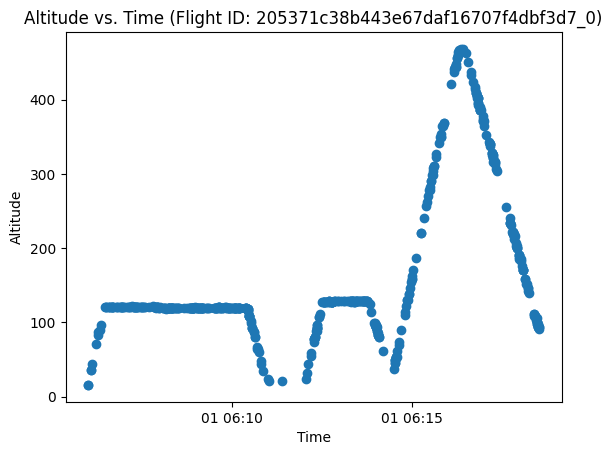

count                              142
mean     2023-05-01 09:32:28.964788736
min                2023-05-01 09:25:41
25%                2023-05-01 09:28:26
50%                2023-05-01 09:31:39
75%      2023-05-01 09:36:01.750000128
max                2023-05-01 09:41:07
Name: SensorTime, dtype: object


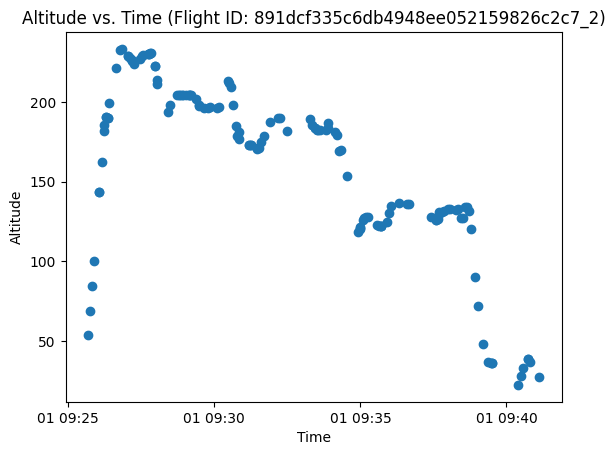

count                              163
mean     2023-05-01 11:16:19.773006080
min                2023-05-01 10:57:26
25%                2023-05-01 11:07:28
50%                2023-05-01 11:17:53
75%                2023-05-01 11:22:42
max                2023-05-01 11:39:50
Name: SensorTime, dtype: object


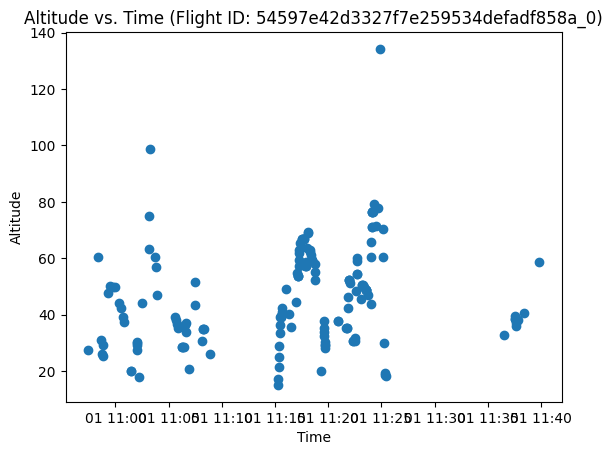

count                              182
mean     2023-05-01 00:23:18.774725120
min                2023-05-01 00:18:14
25%                2023-05-01 00:21:17
50%                2023-05-01 00:22:25
75%      2023-05-01 00:24:19.750000128
max                2023-05-01 00:41:39
Name: SensorTime, dtype: object


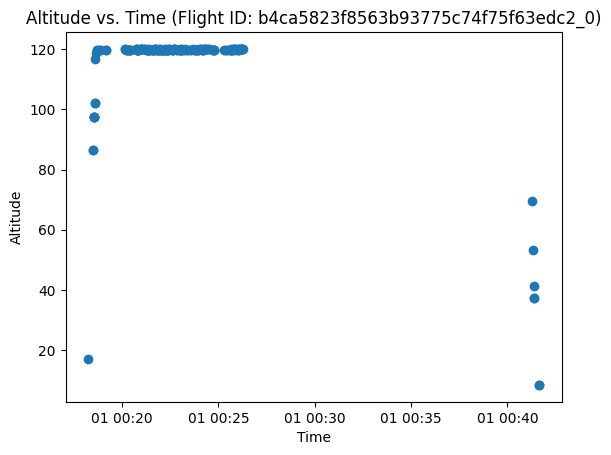

count                              157
mean     2023-05-01 08:37:53.426751488
min                2023-05-01 08:28:07
25%                2023-05-01 08:30:33
50%                2023-05-01 08:36:21
75%                2023-05-01 08:45:03
max                2023-05-01 08:52:06
Name: SensorTime, dtype: object


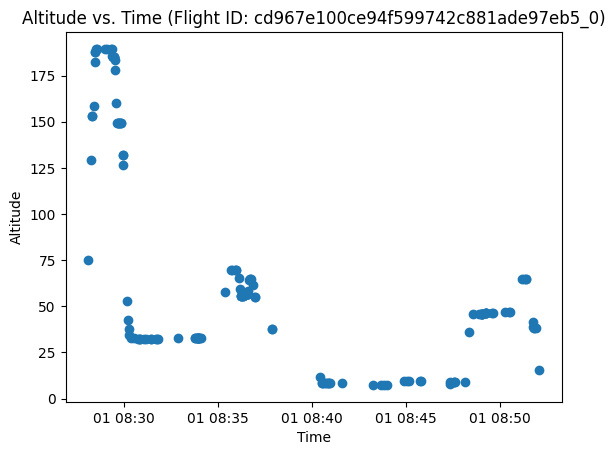

count                             1579
mean     2023-05-01 09:56:42.314756096
min                2023-05-01 09:45:39
25%                2023-05-01 09:51:43
50%                2023-05-01 09:56:42
75%         2023-05-01 10:01:34.500000
max                2023-05-01 10:07:06
Name: SensorTime, dtype: object


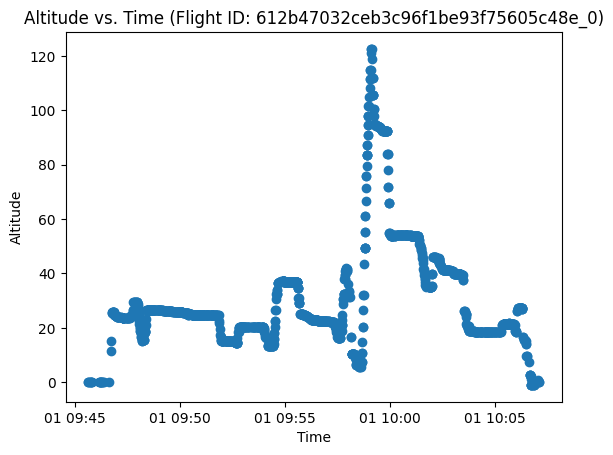

count                              415
mean     2023-05-01 07:44:22.137349376
min                2023-05-01 07:14:51
25%                2023-05-01 07:43:06
50%                2023-05-01 07:48:28
75%                2023-05-01 07:54:15
max                2023-05-01 08:00:33
Name: SensorTime, dtype: object


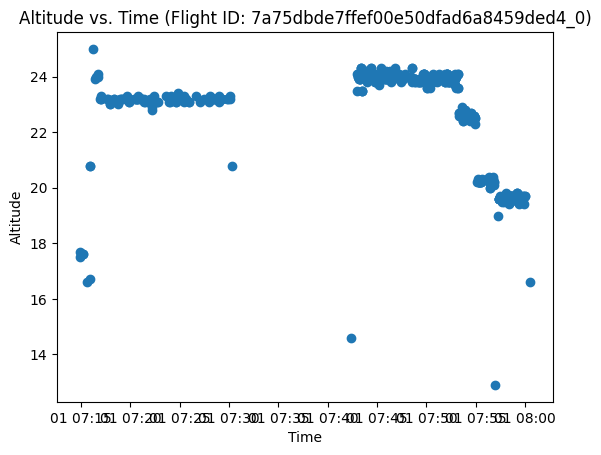

count                              237
mean     2023-05-01 11:57:58.126582272
min                2023-05-01 11:53:12
25%                2023-05-01 11:55:37
50%                2023-05-01 11:58:48
75%                2023-05-01 12:00:28
max                2023-05-01 12:01:37
Name: SensorTime, dtype: object


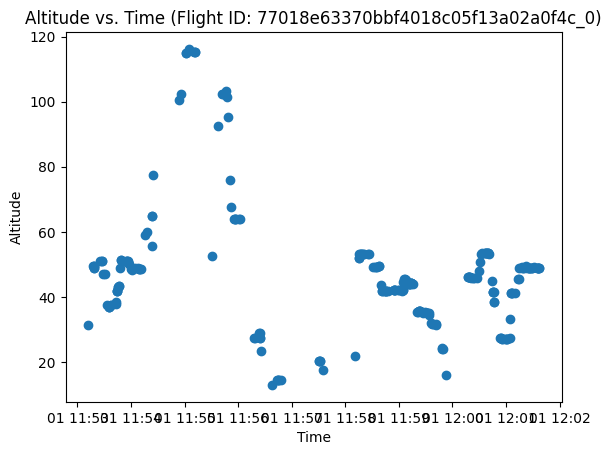

count                              143
mean     2023-05-01 04:37:23.062936832
min                2023-05-01 04:31:13
25%                2023-05-01 04:34:17
50%                2023-05-01 04:37:58
75%                2023-05-01 04:40:32
max                2023-05-01 04:41:57
Name: SensorTime, dtype: object


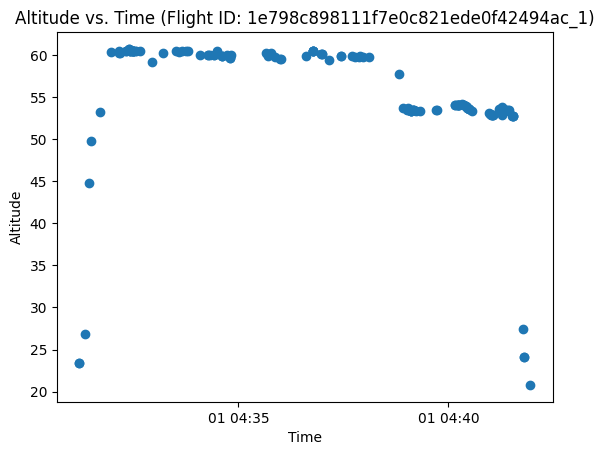

count                              257
mean     2023-05-01 05:50:22.521400576
min                2023-05-01 04:18:31
25%                2023-05-01 04:40:47
50%                2023-05-01 05:59:04
75%                2023-05-01 06:36:27
max                2023-05-01 08:33:44
Name: SensorTime, dtype: object


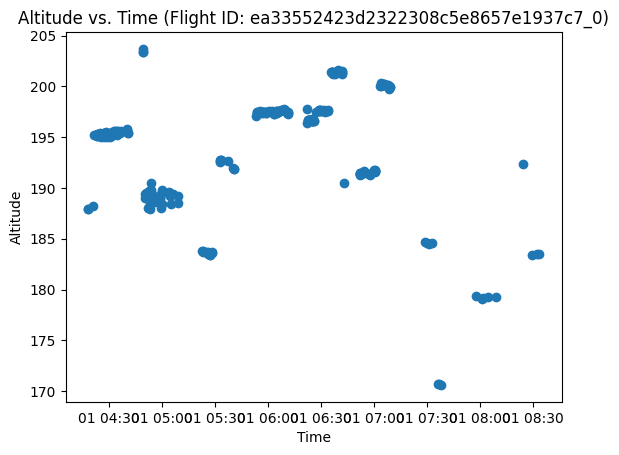

count                              219
mean     2023-05-01 11:09:58.730593280
min                2023-05-01 10:45:45
25%                2023-05-01 10:52:28
50%                2023-05-01 11:12:14
75%         2023-05-01 11:28:11.500000
max                2023-05-01 11:32:22
Name: SensorTime, dtype: object


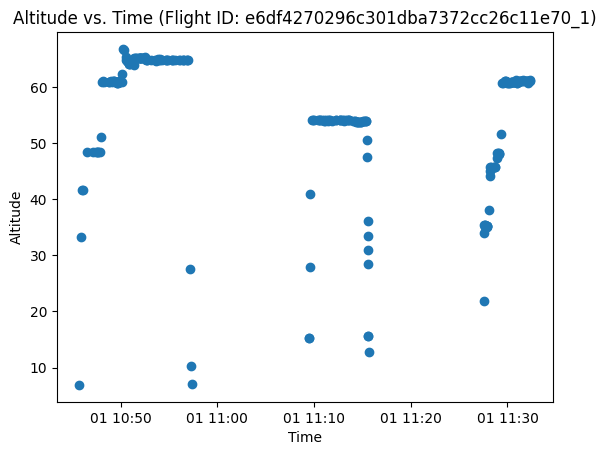

count                              192
mean     2023-05-01 12:16:27.651041536
min                2023-05-01 11:57:29
25%      2023-05-01 12:03:50.249999872
50%                2023-05-01 12:11:29
75%      2023-05-01 12:27:21.249999872
max                2023-05-01 12:48:16
Name: SensorTime, dtype: object


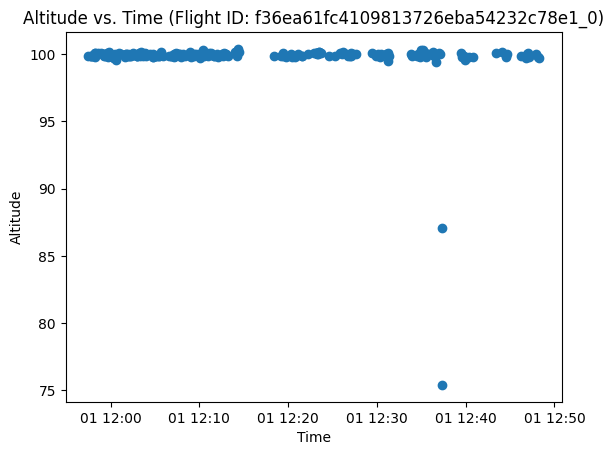

count                              297
mean     2023-05-01 10:27:02.020202240
min                2023-05-01 10:21:19
25%                2023-05-01 10:24:05
50%                2023-05-01 10:26:53
75%                2023-05-01 10:30:02
max                2023-05-01 10:32:57
Name: SensorTime, dtype: object


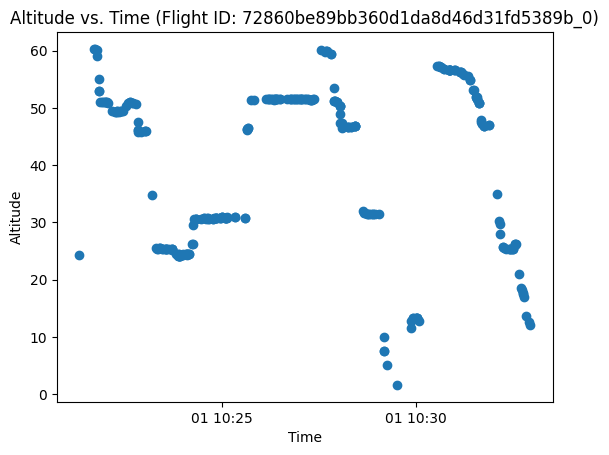

count                              288
mean     2023-05-01 09:41:39.989583360
min                2023-05-01 09:39:02
25%                2023-05-01 09:40:35
50%                2023-05-01 09:41:42
75%      2023-05-01 09:42:53.750000128
max                2023-05-01 09:44:12
Name: SensorTime, dtype: object


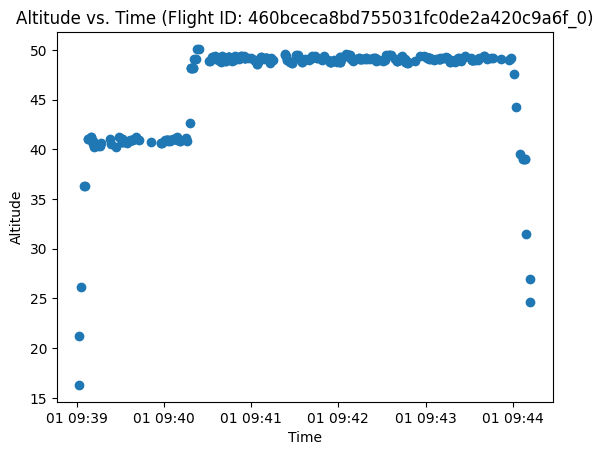

count                              126
mean     2023-05-01 10:57:36.349206272
min                2023-05-01 10:53:55
25%         2023-05-01 10:55:31.500000
50%                2023-05-01 10:57:24
75%         2023-05-01 11:00:00.500000
max                2023-05-01 11:01:58
Name: SensorTime, dtype: object


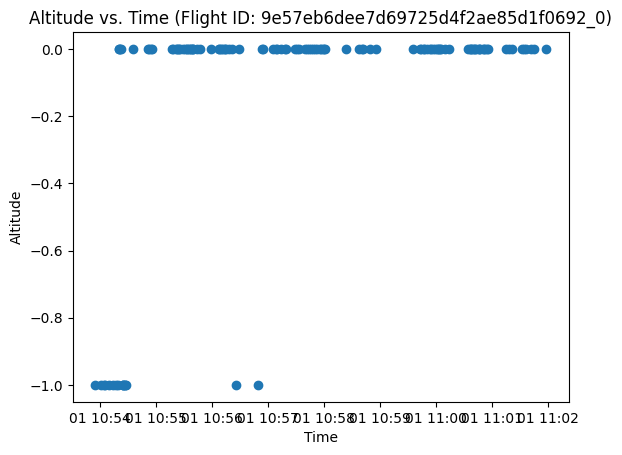

count                              456
mean     2023-05-01 10:29:36.076754688
min                2023-05-01 10:21:08
25%      2023-05-01 10:24:44.750000128
50%         2023-05-01 10:29:36.500000
75%      2023-05-01 10:34:13.249999872
max                2023-05-01 10:38:28
Name: SensorTime, dtype: object


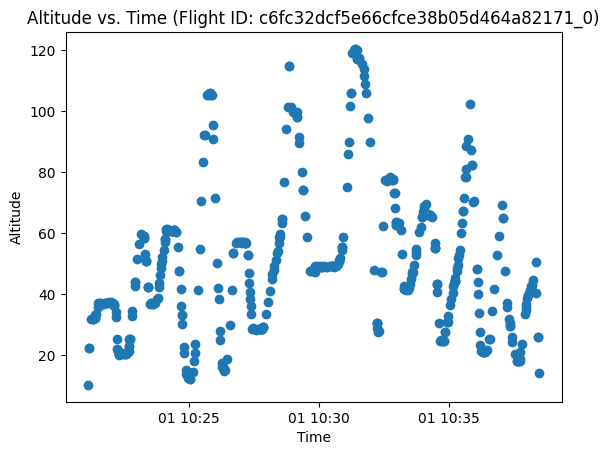

count                              275
mean     2023-05-01 08:33:36.367272704
min                2023-05-01 06:20:03
25%         2023-05-01 07:37:48.500000
50%                2023-05-01 08:48:36
75%                2023-05-01 09:31:36
max                2023-05-01 10:34:35
Name: SensorTime, dtype: object


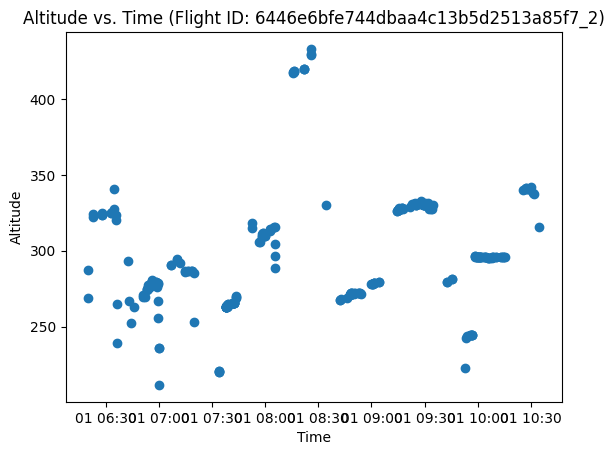

count                              157
mean     2023-05-01 09:42:36.210191104
min                2023-05-01 09:40:11
25%                2023-05-01 09:41:35
50%                2023-05-01 09:42:32
75%                2023-05-01 09:43:50
max                2023-05-01 09:44:54
Name: SensorTime, dtype: object


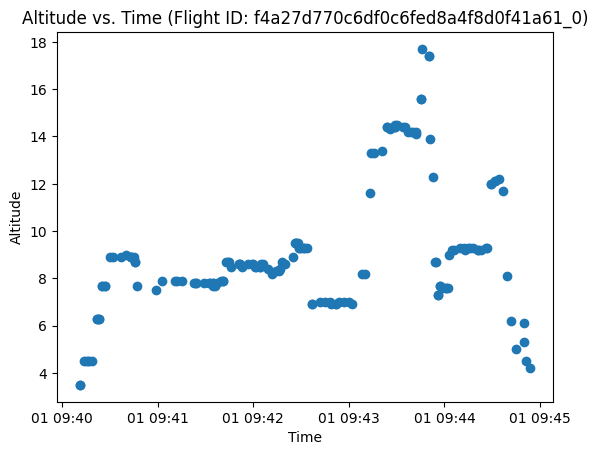

count                             3193
mean     2023-05-01 12:37:32.101158912
min                2023-05-01 11:59:42
25%                2023-05-01 12:28:34
50%                2023-05-01 12:38:26
75%                2023-05-01 12:50:24
max                2023-05-01 13:01:05
Name: SensorTime, dtype: object


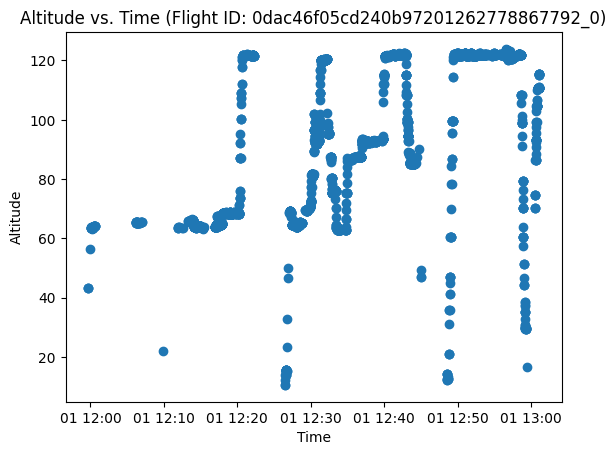

count                              152
mean     2023-05-01 12:06:47.703947264
min                2023-05-01 11:25:28
25%                2023-05-01 11:53:52
50%                2023-05-01 12:10:11
75%         2023-05-01 12:26:12.500000
max                2023-05-01 12:39:41
Name: SensorTime, dtype: object


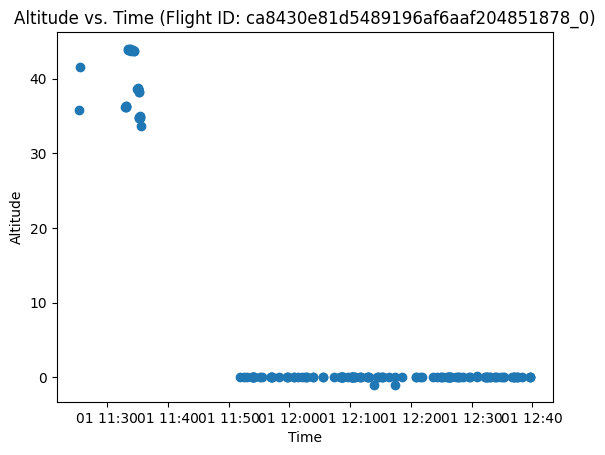

count                              161
mean     2023-05-01 11:30:53.453416192
min                2023-05-01 11:26:16
25%                2023-05-01 11:28:27
50%                2023-05-01 11:29:53
75%                2023-05-01 11:30:55
max                2023-05-01 11:41:04
Name: SensorTime, dtype: object


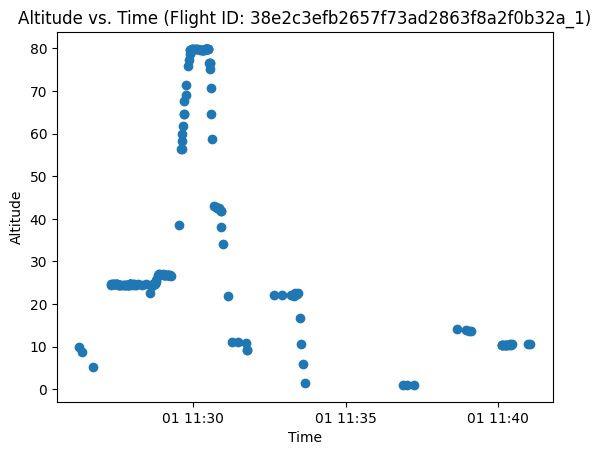

count                              224
mean     2023-05-01 07:13:18.915178496
min                2023-05-01 07:10:44
25%      2023-05-01 07:11:12.750000128
50%                2023-05-01 07:13:13
75%                2023-05-01 07:15:23
max                2023-05-01 07:17:06
Name: SensorTime, dtype: object


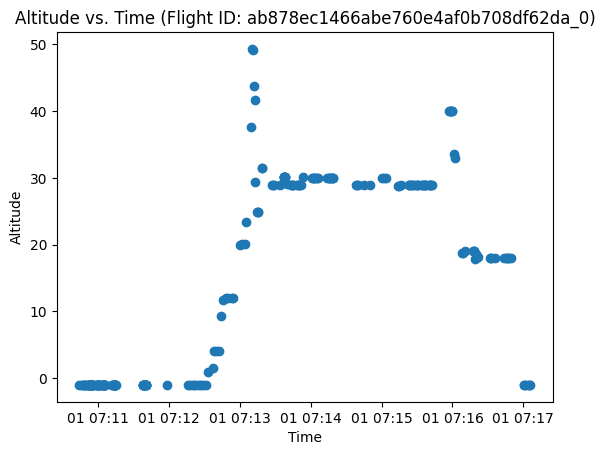

count                             2586
mean     2023-05-01 08:07:55.616782592
min                2023-05-01 07:15:54
25%      2023-05-01 07:32:56.249999872
50%         2023-05-01 07:54:52.500000
75%      2023-05-01 08:36:00.249999872
max                2023-05-01 09:23:41
Name: SensorTime, dtype: object


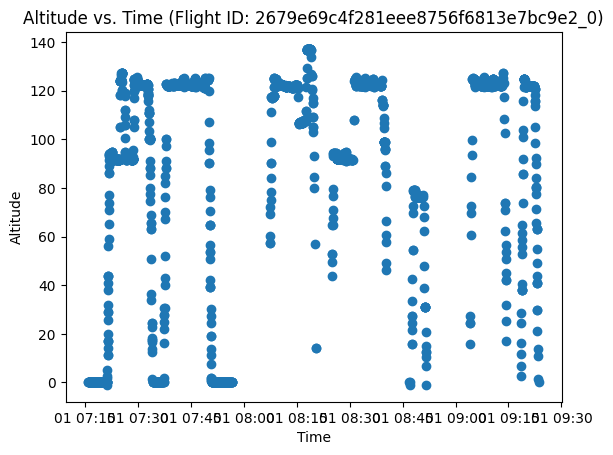

count                             2069
mean     2023-05-01 11:23:44.260028928
min                2023-05-01 11:01:00
25%                2023-05-01 11:12:13
50%                2023-05-01 11:23:40
75%                2023-05-01 11:34:48
max                2023-05-01 11:46:52
Name: SensorTime, dtype: object


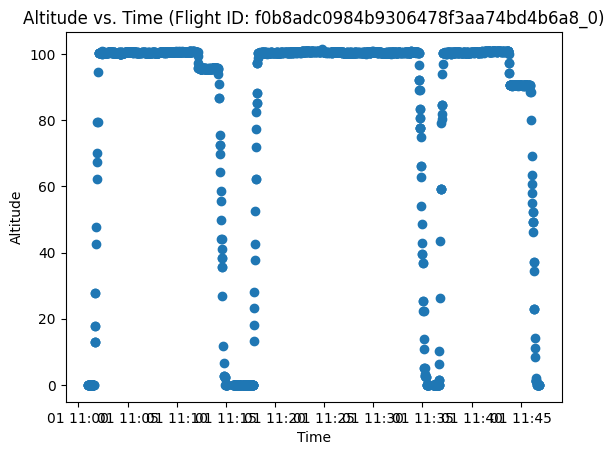

count                              464
mean     2023-05-01 11:54:34.950431232
min                2023-05-01 11:49:59
25%                2023-05-01 11:51:38
50%                2023-05-01 11:53:01
75%                2023-05-01 12:00:07
max                2023-05-01 12:02:04
Name: SensorTime, dtype: object


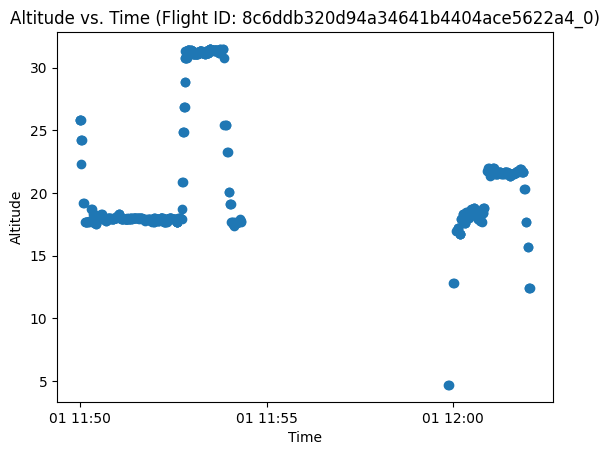

count                              132
mean     2023-05-01 04:06:09.492424448
min                2023-05-01 04:01:53
25%      2023-05-01 04:04:15.750000128
50%                2023-05-01 04:06:34
75%      2023-05-01 04:07:52.750000128
max                2023-05-01 04:10:25
Name: SensorTime, dtype: object


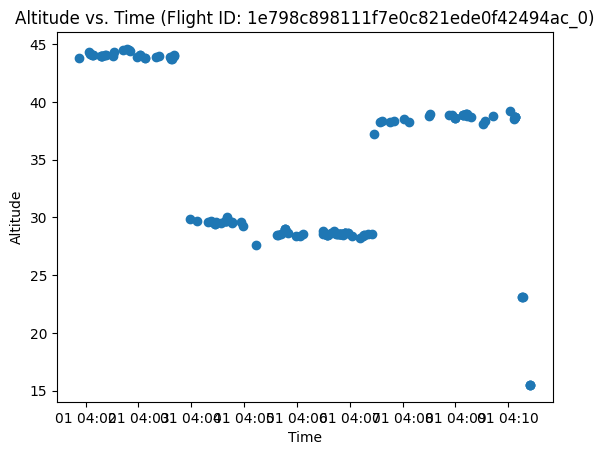

count                              118
mean     2023-05-01 09:59:42.661016832
min                2023-05-01 09:50:44
25%      2023-05-01 09:56:15.249999872
50%                2023-05-01 10:00:10
75%         2023-05-01 10:02:27.500000
max                2023-05-01 10:09:05
Name: SensorTime, dtype: object


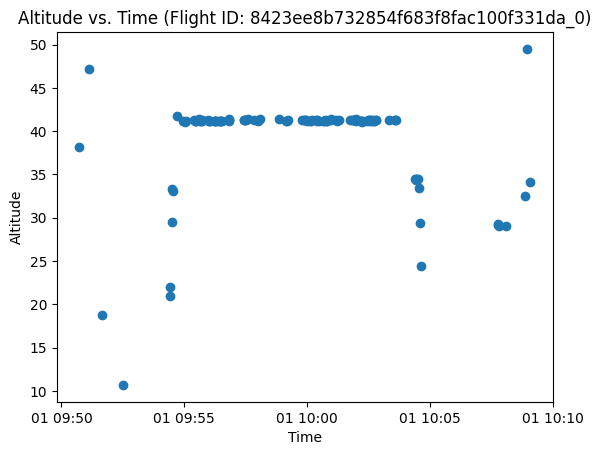

count                              552
mean     2023-05-01 11:04:20.880434688
min                2023-05-01 10:32:40
25%      2023-05-01 10:38:38.249999872
50%         2023-05-01 11:02:54.500000
75%         2023-05-01 11:24:21.500000
max                2023-05-01 11:26:46
Name: SensorTime, dtype: object


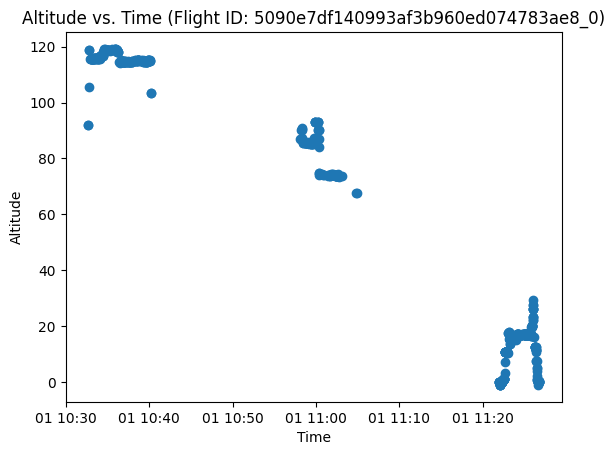

count                              234
mean     2023-05-01 07:10:29.807692288
min                2023-05-01 07:08:08
25%      2023-05-01 07:09:16.249999872
50%         2023-05-01 07:10:26.500000
75%                2023-05-01 07:11:41
max                2023-05-01 07:15:24
Name: SensorTime, dtype: object


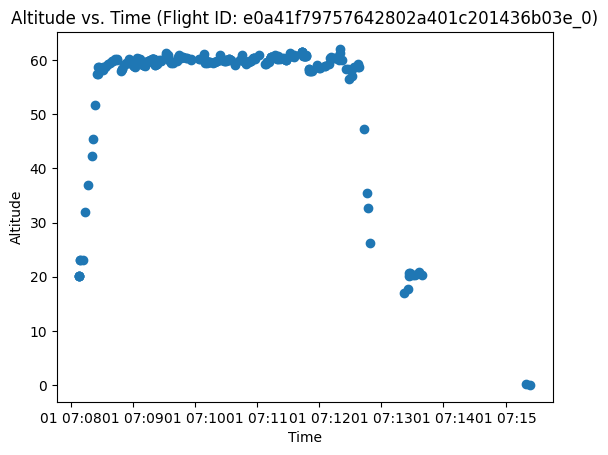

count                              154
mean     2023-05-01 11:29:37.454545408
min                2023-05-01 11:18:00
25%      2023-05-01 11:27:06.249999872
50%                2023-05-01 11:30:04
75%      2023-05-01 11:33:13.750000128
max                2023-05-01 11:51:12
Name: SensorTime, dtype: object


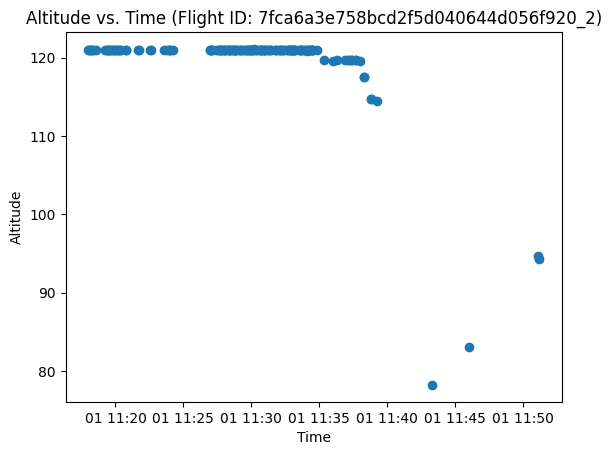

count                              186
mean     2023-05-01 06:24:21.236559104
min                2023-05-01 05:17:57
25%      2023-05-01 05:30:26.249999872
50%                2023-05-01 06:09:01
75%                2023-05-01 06:57:33
max                2023-05-01 08:23:06
Name: SensorTime, dtype: object


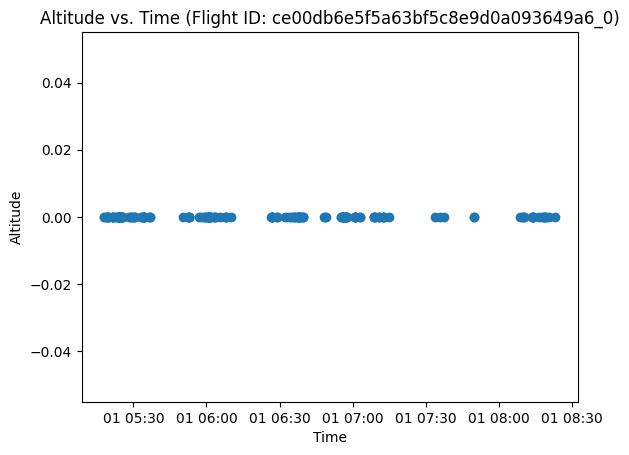

count                              117
mean     2023-05-01 09:40:58.914530048
min                2023-05-01 09:35:16
25%                2023-05-01 09:36:36
50%                2023-05-01 09:42:53
75%                2023-05-01 09:45:23
max                2023-05-01 09:46:22
Name: SensorTime, dtype: object


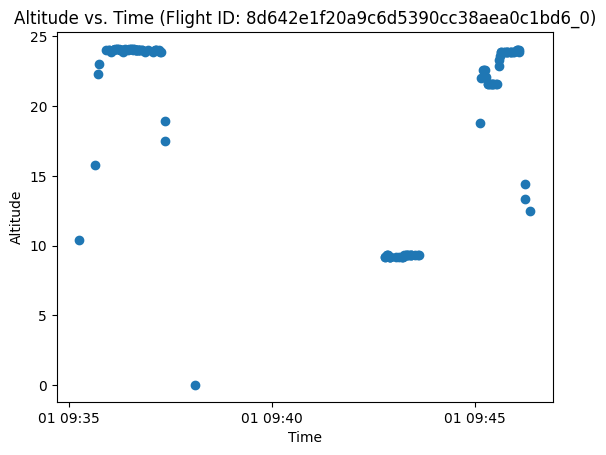

count                              168
mean     2023-05-01 03:42:57.380952320
min                2023-05-01 03:14:00
25%      2023-05-01 03:35:49.750000128
50%                2023-05-01 03:41:51
75%      2023-05-01 03:57:22.249999872
max                2023-05-01 04:15:27
Name: SensorTime, dtype: object


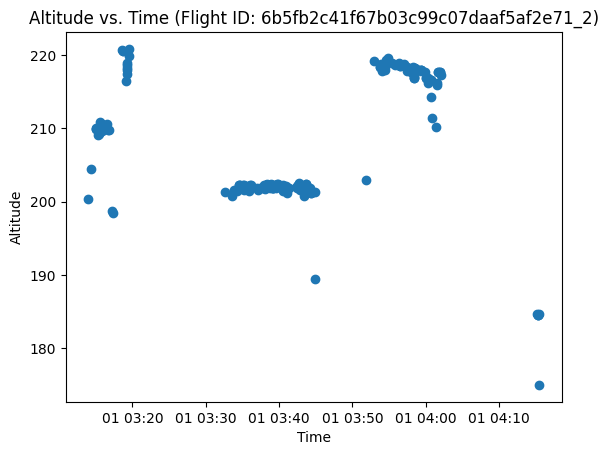

count                              386
mean     2023-05-01 10:21:29.927461120
min                2023-05-01 09:59:11
25%      2023-05-01 10:07:04.249999872
50%         2023-05-01 10:11:11.500000
75%                2023-05-01 10:18:00
max                2023-05-01 11:28:19
Name: SensorTime, dtype: object


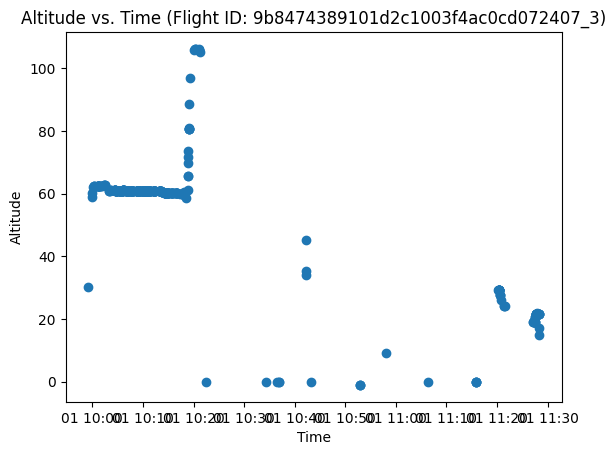

count                              258
mean     2023-05-01 06:22:24.589147136
min                2023-05-01 06:00:54
25%      2023-05-01 06:12:02.249999872
50%         2023-05-01 06:21:49.500000
75%      2023-05-01 06:31:04.249999872
max                2023-05-01 06:55:47
Name: SensorTime, dtype: object


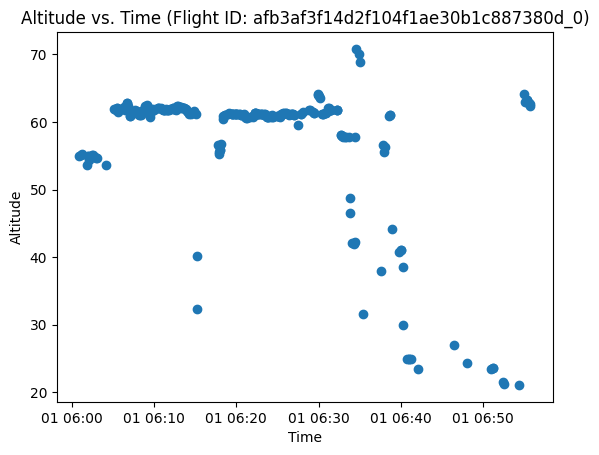

count                              346
mean     2023-05-01 06:02:57.369942272
min                2023-05-01 05:57:59
25%                2023-05-01 06:00:53
50%                2023-05-01 06:02:57
75%         2023-05-01 06:04:51.500000
max                2023-05-01 06:07:03
Name: SensorTime, dtype: object


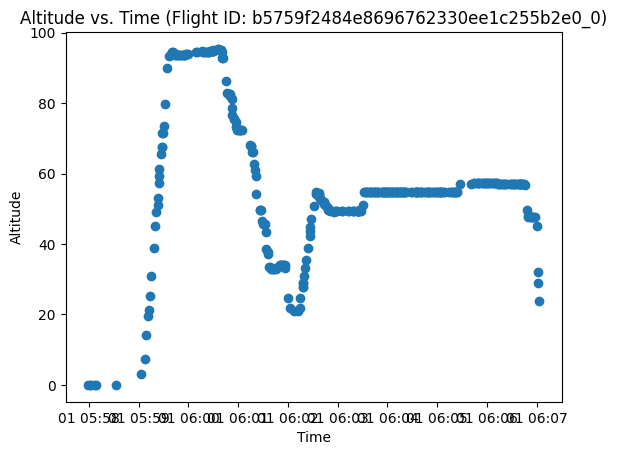

count                              322
mean     2023-05-01 05:04:47.798136832
min                2023-05-01 04:46:34
25%      2023-05-01 05:04:41.249999872
50%         2023-05-01 05:07:31.500000
75%      2023-05-01 05:10:27.750000128
max                2023-05-01 05:13:10
Name: SensorTime, dtype: object


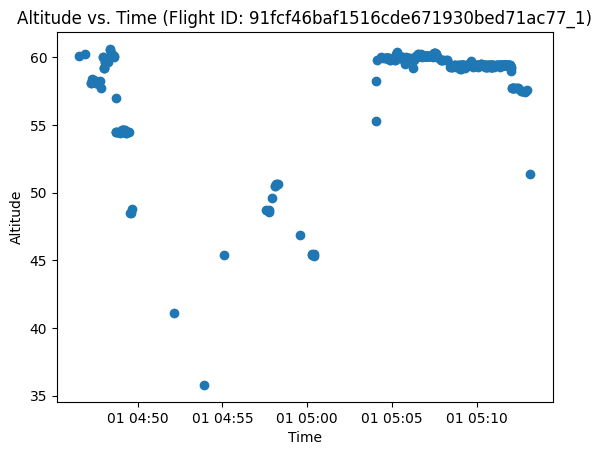

count                             1293
mean     2023-05-01 09:58:29.047177216
min                2023-05-01 09:38:23
25%                2023-05-01 09:47:22
50%                2023-05-01 09:59:44
75%                2023-05-01 10:09:11
max                2023-05-01 10:17:59
Name: SensorTime, dtype: object


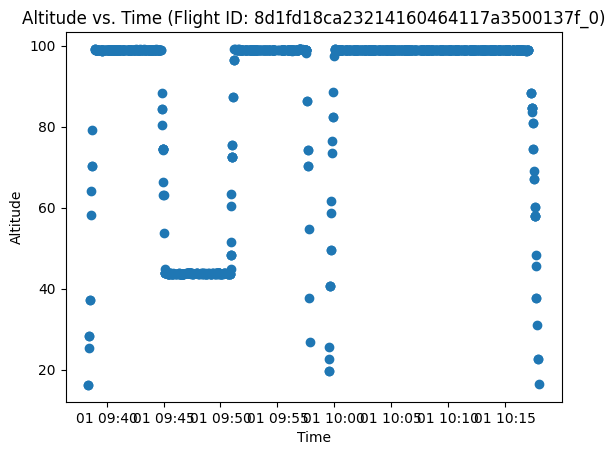

count                              404
mean     2023-05-01 11:30:45.915841536
min                2023-05-01 11:24:04
25%      2023-05-01 11:27:13.750000128
50%         2023-05-01 11:30:59.500000
75%      2023-05-01 11:34:18.249999872
max                2023-05-01 11:36:58
Name: SensorTime, dtype: object


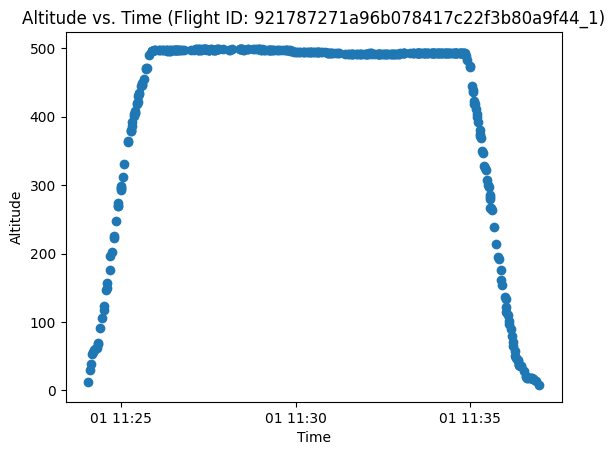

count                              136
mean     2023-05-01 12:02:20.602941184
min                2023-05-01 11:51:24
25%         2023-05-01 11:57:54.500000
50%         2023-05-01 12:02:48.500000
75%                2023-05-01 12:06:51
max                2023-05-01 12:11:13
Name: SensorTime, dtype: object


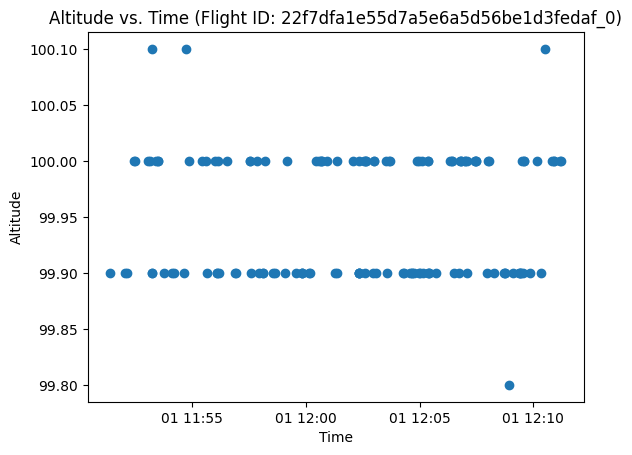

count                              389
mean     2023-05-01 11:23:53.886889472
min                2023-05-01 11:19:43
25%                2023-05-01 11:21:48
50%                2023-05-01 11:23:43
75%                2023-05-01 11:25:55
max                2023-05-01 11:28:57
Name: SensorTime, dtype: object


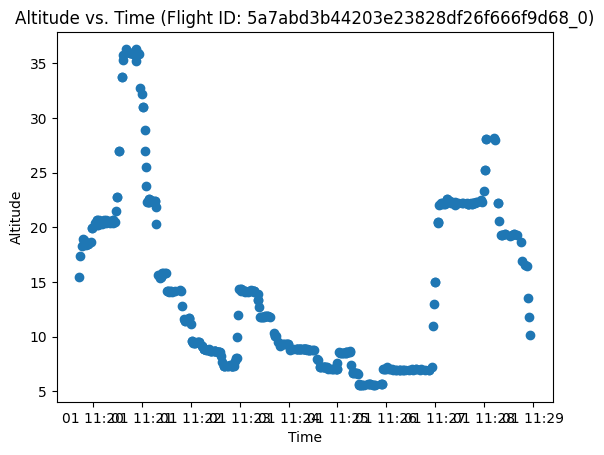

count                              118
mean     2023-05-01 10:51:11.101695232
min                2023-05-01 10:45:24
25%                2023-05-01 10:47:36
50%                2023-05-01 10:50:24
75%         2023-05-01 10:55:43.500000
max                2023-05-01 10:58:54
Name: SensorTime, dtype: object


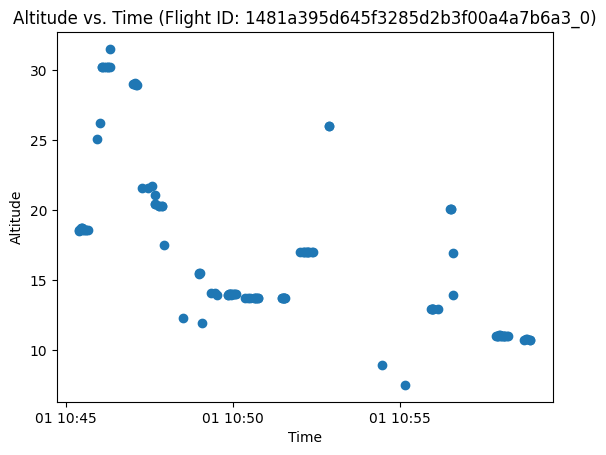

count                              255
mean     2023-05-01 05:41:28.352941056
min                2023-05-01 05:31:36
25%                2023-05-01 05:36:30
50%                2023-05-01 05:41:05
75%         2023-05-01 05:46:06.500000
max                2023-05-01 05:52:14
Name: SensorTime, dtype: object


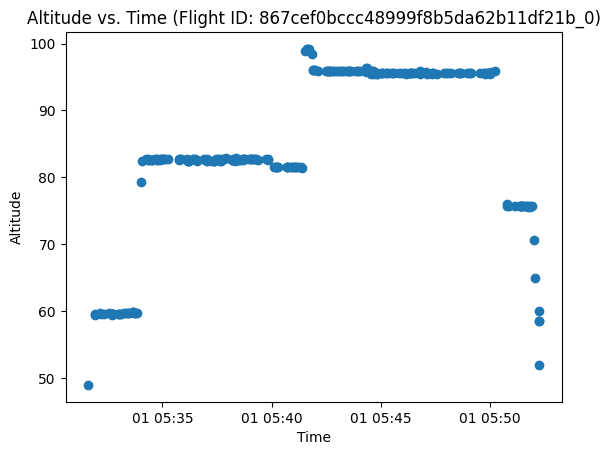

count                             3451
mean     2023-05-01 06:15:40.269197568
min                2023-05-01 04:15:58
25%         2023-05-01 05:20:09.500000
50%                2023-05-01 06:16:23
75%                2023-05-01 07:12:19
max                2023-05-01 08:18:45
Name: SensorTime, dtype: object


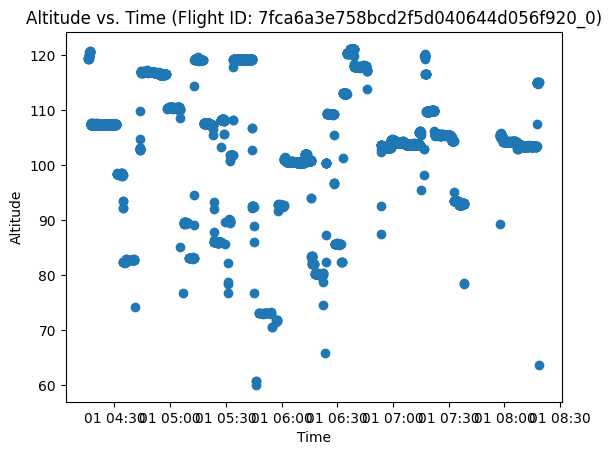

count                              451
mean     2023-05-01 08:30:52.592017664
min                2023-05-01 08:16:31
25%         2023-05-01 08:21:14.500000
50%                2023-05-01 08:32:40
75%         2023-05-01 08:39:28.500000
max                2023-05-01 08:44:59
Name: SensorTime, dtype: object


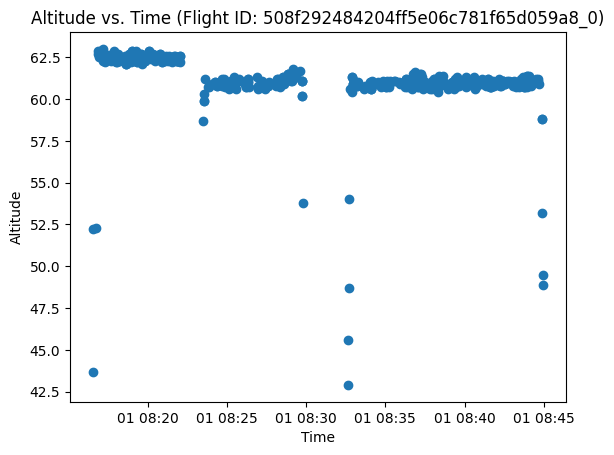

count                              128
mean     2023-05-01 11:26:09.164062464
min                2023-05-01 11:19:06
25%                2023-05-01 11:21:54
50%                2023-05-01 11:26:10
75%      2023-05-01 11:31:22.750000128
max                2023-05-01 11:34:21
Name: SensorTime, dtype: object


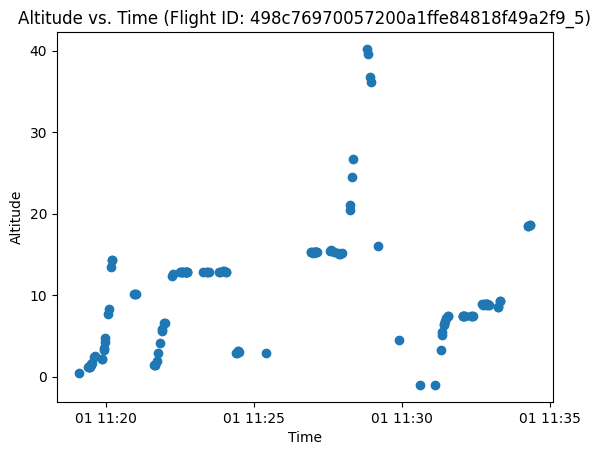

count                              278
mean     2023-05-01 09:39:48.643884800
min                2023-05-01 09:16:12
25%                2023-05-01 09:26:21
50%                2023-05-01 09:29:20
75%         2023-05-01 10:01:51.500000
max                2023-05-01 10:10:55
Name: SensorTime, dtype: object


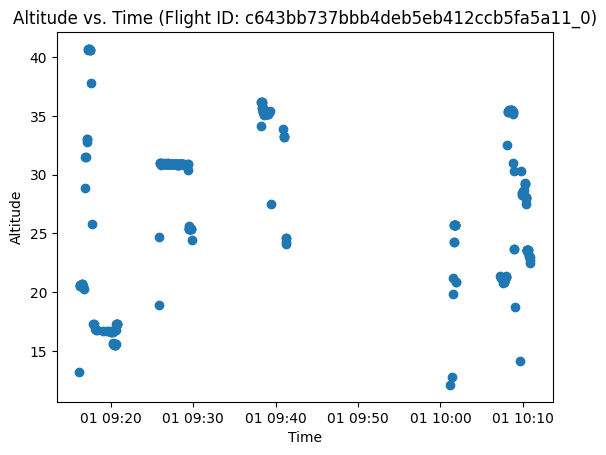

count                              398
mean     2023-05-01 07:34:03.414573056
min                2023-05-01 07:29:04
25%      2023-05-01 07:31:41.249999872
50%                2023-05-01 07:34:26
75%                2023-05-01 07:36:24
max                2023-05-01 07:38:56
Name: SensorTime, dtype: object


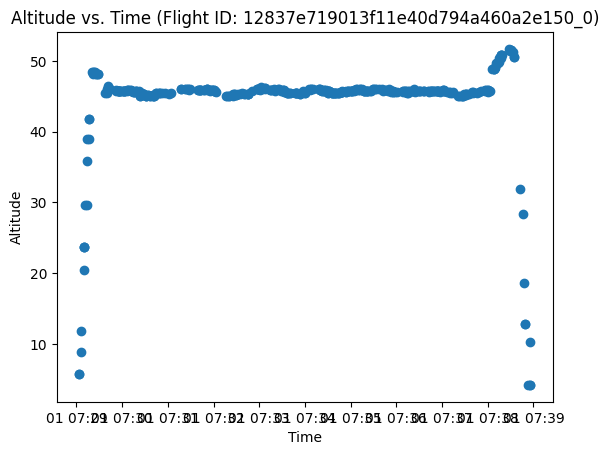

count                              105
mean     2023-05-01 12:01:22.333333248
min                2023-05-01 11:45:58
25%                2023-05-01 12:01:32
50%                2023-05-01 12:02:47
75%                2023-05-01 12:03:40
max                2023-05-01 12:09:12
Name: SensorTime, dtype: object


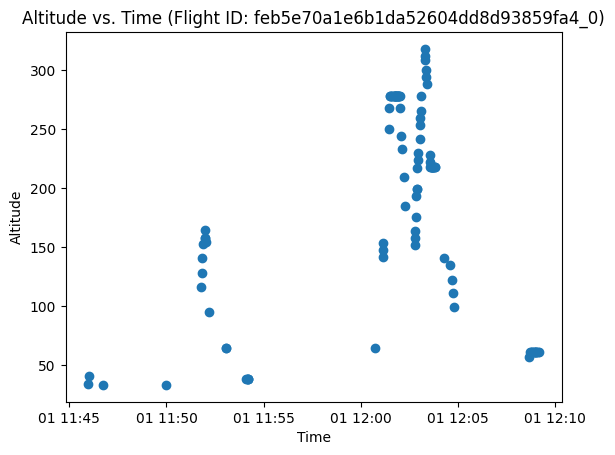

count                              416
mean     2023-05-01 11:19:09.372596224
min                2023-05-01 11:10:12
25%                2023-05-01 11:12:53
50%         2023-05-01 11:20:23.500000
75%                2023-05-01 11:22:36
max                2023-05-01 11:30:36
Name: SensorTime, dtype: object


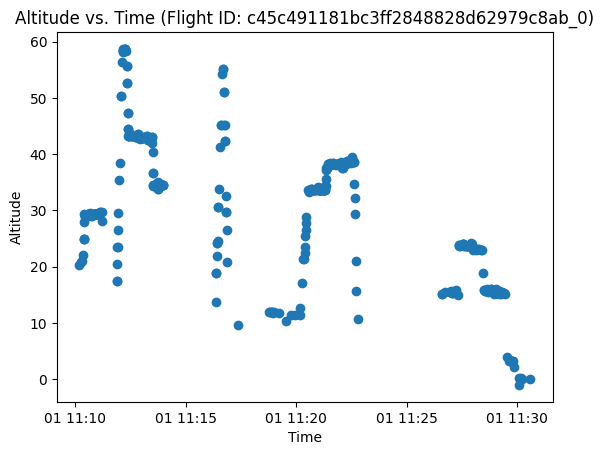

count                              684
mean     2023-05-01 11:47:47.796783616
min                2023-05-01 11:38:53
25%      2023-05-01 11:43:46.750000128
50%                2023-05-01 11:47:47
75%      2023-05-01 11:51:44.249999872
max                2023-05-01 11:56:08
Name: SensorTime, dtype: object


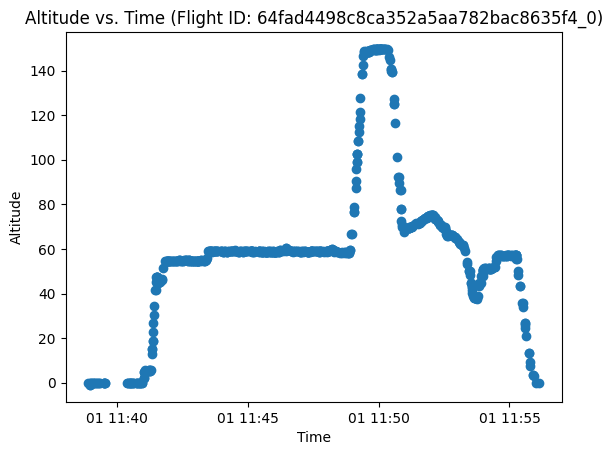

count                              107
mean     2023-05-01 02:42:38.186915840
min                2023-05-01 02:27:05
25%         2023-05-01 02:29:26.500000
50%                2023-05-01 02:44:53
75%         2023-05-01 02:50:44.500000
max                2023-05-01 02:58:52
Name: SensorTime, dtype: object


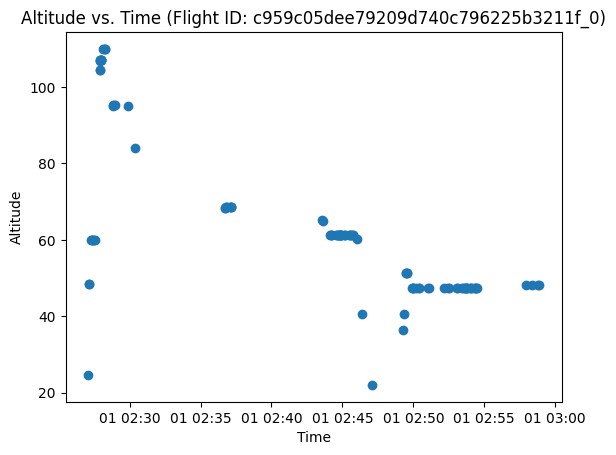

count                              138
mean     2023-05-01 10:43:04.282608896
min                2023-05-01 10:34:22
25%         2023-05-01 10:39:19.500000
50%         2023-05-01 10:42:34.500000
75%      2023-05-01 10:45:39.750000128
max                2023-05-01 10:53:11
Name: SensorTime, dtype: object


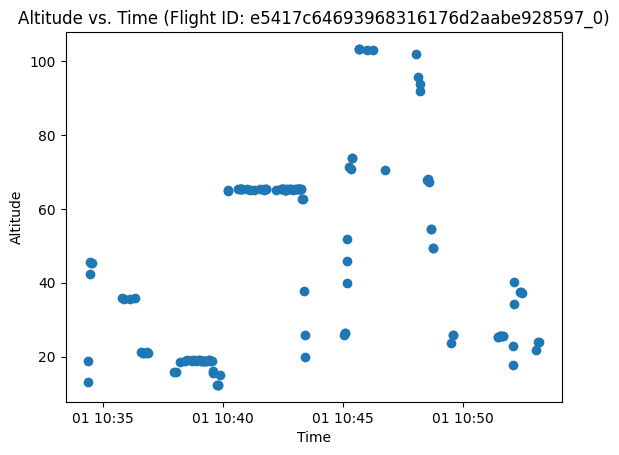

count                              164
mean     2023-05-01 07:54:13.536585472
min                2023-05-01 07:47:45
25%                2023-05-01 07:51:06
50%         2023-05-01 07:53:05.500000
75%      2023-05-01 07:58:05.750000128
max                2023-05-01 08:03:34
Name: SensorTime, dtype: object


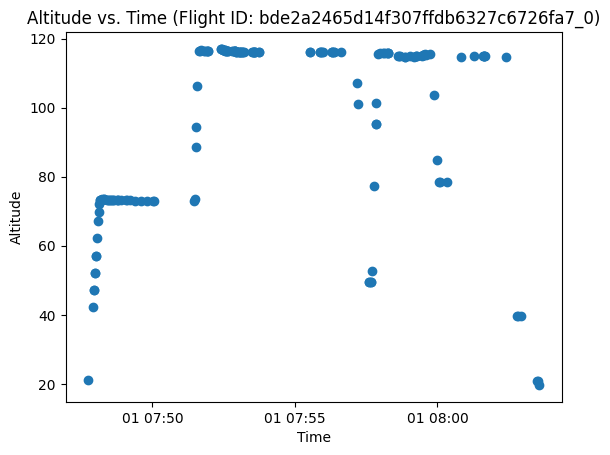

count                              341
mean     2023-05-01 05:32:26.495601152
min                2023-05-01 04:55:59
25%                2023-05-01 05:10:54
50%                2023-05-01 05:29:57
75%                2023-05-01 05:43:34
max                2023-05-01 06:17:29
Name: SensorTime, dtype: object


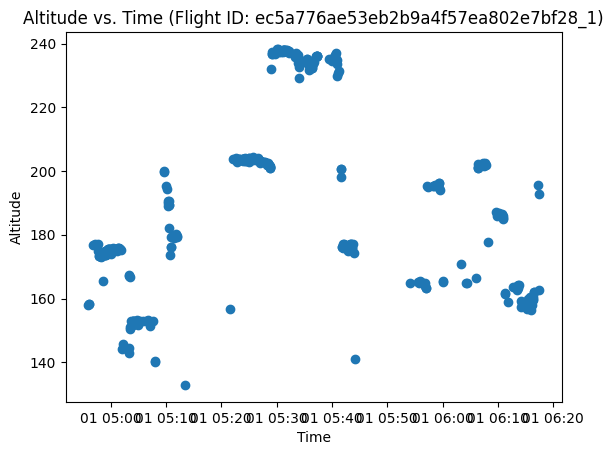

count                              140
mean     2023-05-01 09:32:36.350000128
min                2023-05-01 09:26:03
25%                2023-05-01 09:30:29
50%         2023-05-01 09:32:48.500000
75%                2023-05-01 09:35:50
max                2023-05-01 09:38:18
Name: SensorTime, dtype: object


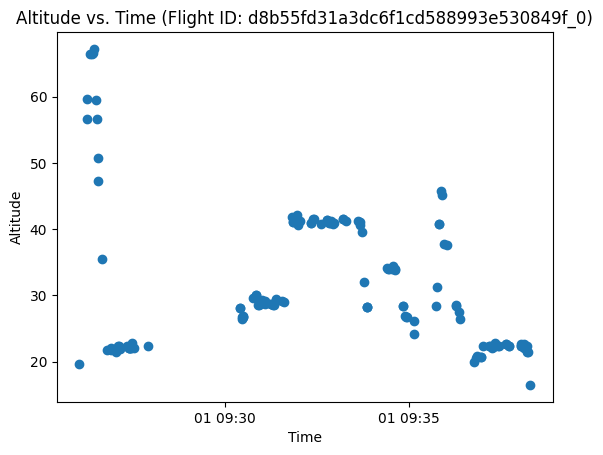

count                              137
mean     2023-05-01 11:26:28.211678720
min                2023-05-01 11:19:41
25%                2023-05-01 11:23:08
50%                2023-05-01 11:25:31
75%                2023-05-01 11:29:56
max                2023-05-01 11:34:44
Name: SensorTime, dtype: object


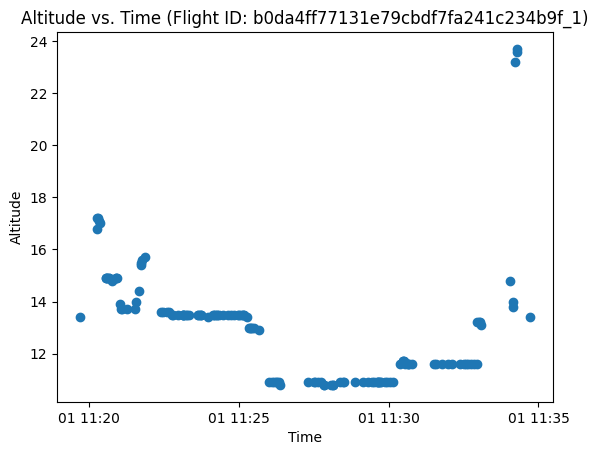

count                              887
mean     2023-05-01 00:36:18.660653824
min                2023-05-01 00:23:58
25%                2023-05-01 00:29:57
50%                2023-05-01 00:35:22
75%         2023-05-01 00:43:01.500000
max                2023-05-01 00:49:46
Name: SensorTime, dtype: object


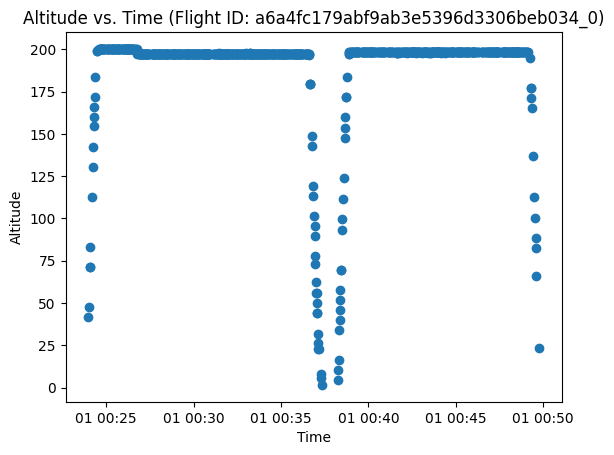

count                              429
mean     2023-05-01 10:14:07.899766528
min                2023-05-01 10:08:18
25%                2023-05-01 10:11:36
50%                2023-05-01 10:14:18
75%                2023-05-01 10:16:51
max                2023-05-01 10:19:32
Name: SensorTime, dtype: object


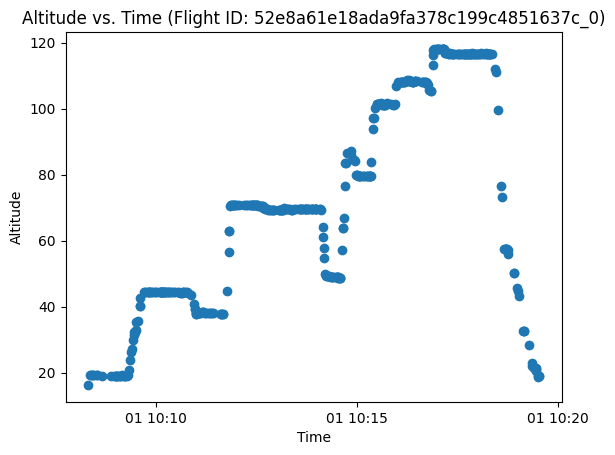

count                              377
mean     2023-05-01 06:17:30.946949632
min                2023-05-01 05:34:36
25%                2023-05-01 05:47:26
50%                2023-05-01 06:16:53
75%                2023-05-01 06:27:05
max                2023-05-01 07:28:14
Name: SensorTime, dtype: object


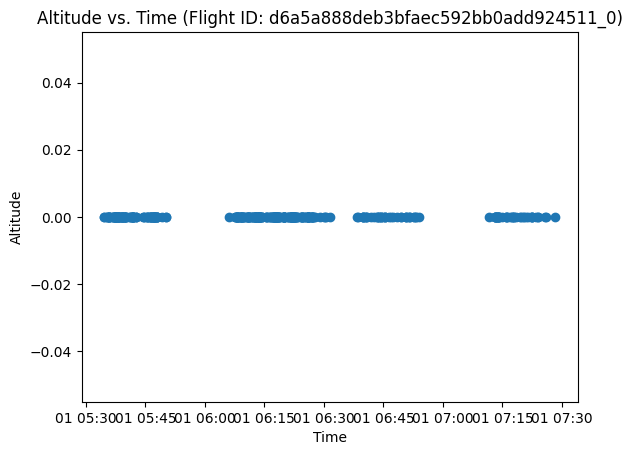

count                              244
mean     2023-05-01 00:29:06.049180416
min                2023-05-01 00:24:26
25%                2023-05-01 00:26:41
50%                2023-05-01 00:28:33
75%                2023-05-01 00:31:39
max                2023-05-01 00:35:08
Name: SensorTime, dtype: object


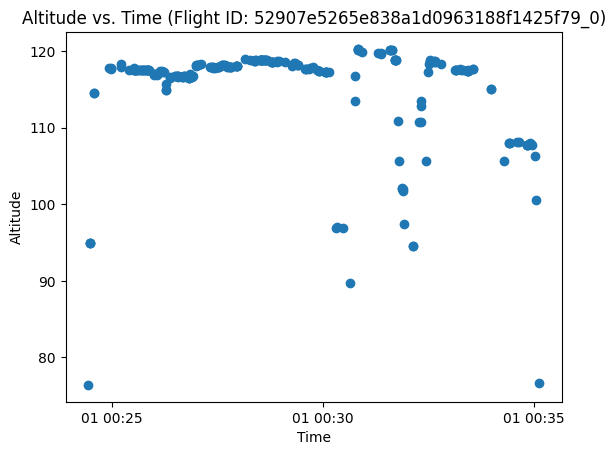

count                              264
mean     2023-05-01 02:32:40.647727360
min                2023-05-01 02:24:11
25%      2023-05-01 02:28:02.750000128
50%                2023-05-01 02:32:57
75%      2023-05-01 02:36:35.249999872
max                2023-05-01 02:41:46
Name: SensorTime, dtype: object


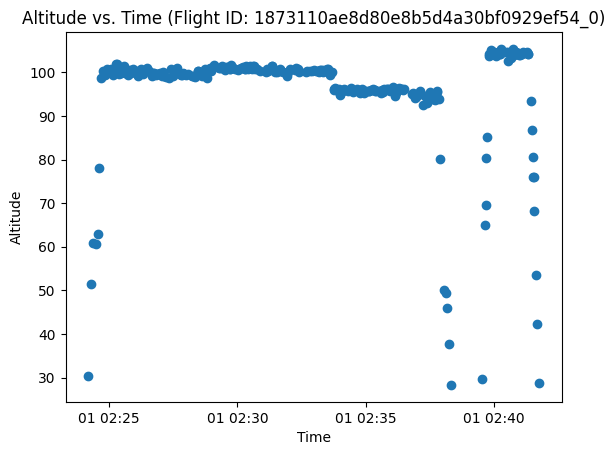

count                              149
mean     2023-05-01 11:04:51.912751872
min                2023-05-01 10:56:03
25%                2023-05-01 11:00:35
50%                2023-05-01 11:04:55
75%                2023-05-01 11:08:58
max                2023-05-01 11:13:14
Name: SensorTime, dtype: object


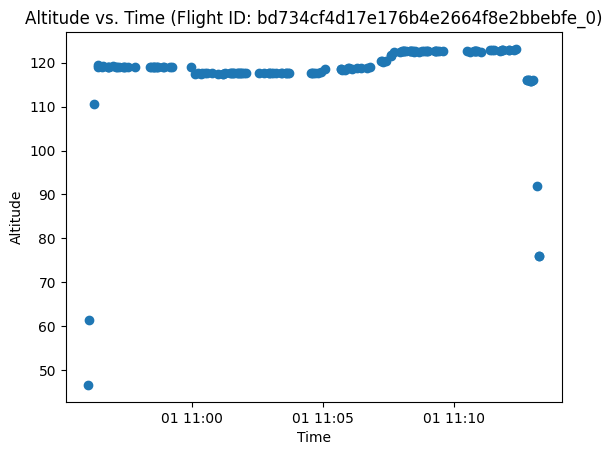

count                             2737
mean     2023-05-01 10:35:54.469126656
min                2023-05-01 09:43:24
25%                2023-05-01 10:10:18
50%                2023-05-01 10:34:09
75%                2023-05-01 11:02:10
max                2023-05-01 11:31:14
Name: SensorTime, dtype: object


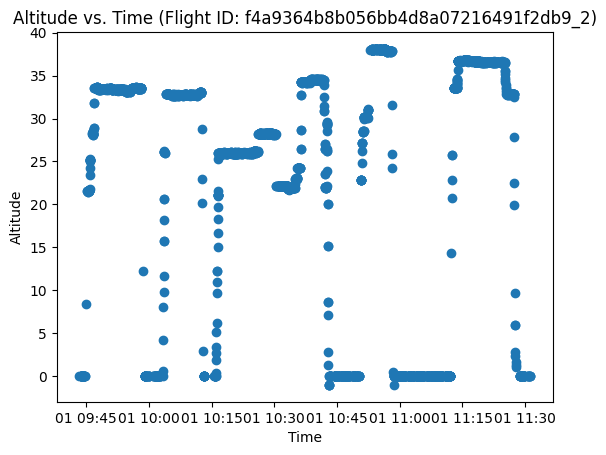

count                              124
mean     2023-05-01 10:58:59.645160960
min                2023-05-01 10:38:58
25%                2023-05-01 10:49:32
50%         2023-05-01 11:01:34.500000
75%      2023-05-01 11:08:56.249999872
max                2023-05-01 11:17:24
Name: SensorTime, dtype: object


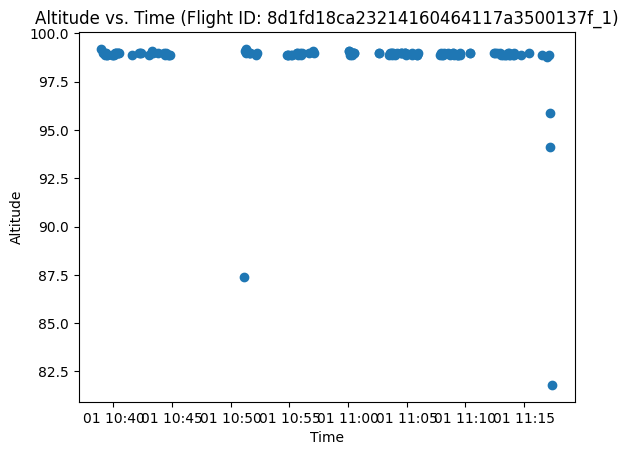

count                              126
mean     2023-05-01 09:27:19.134920448
min                2023-05-01 09:18:50
25%                2023-05-01 09:23:42
50%         2023-05-01 09:27:34.500000
75%      2023-05-01 09:30:58.750000128
max                2023-05-01 09:34:29
Name: SensorTime, dtype: object


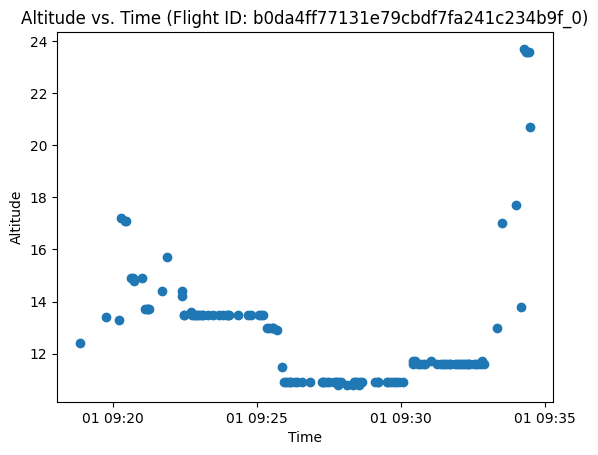

count                             1212
mean     2023-05-01 10:45:14.721122304
min                2023-05-01 10:09:58
25%                2023-05-01 10:34:44
50%         2023-05-01 10:40:58.500000
75%         2023-05-01 11:09:20.500000
max                2023-05-01 11:22:32
Name: SensorTime, dtype: object


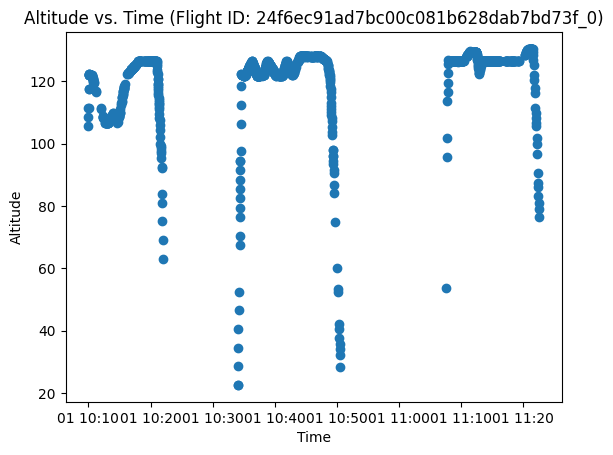

count                              234
mean     2023-05-01 05:49:18.521367296
min                2023-05-01 05:46:33
25%                2023-05-01 05:48:50
50%                2023-05-01 05:49:14
75%                2023-05-01 05:51:08
max                2023-05-01 05:51:31
Name: SensorTime, dtype: object


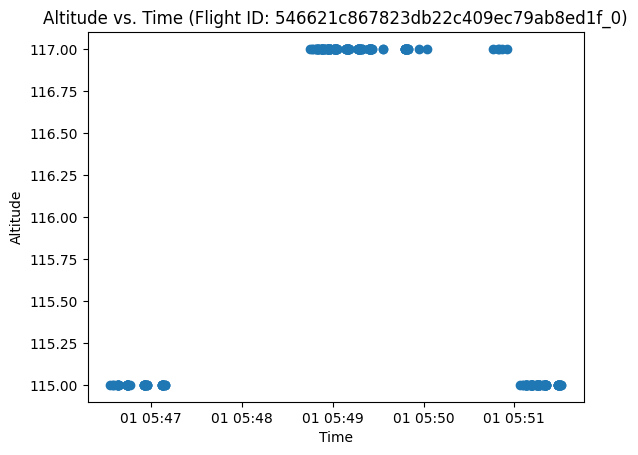

count                              450
mean     2023-05-01 01:30:35.184444160
min                2023-05-01 00:39:18
25%      2023-05-01 01:08:20.249999872
50%         2023-05-01 01:32:57.500000
75%                2023-05-01 01:50:50
max                2023-05-01 02:27:52
Name: SensorTime, dtype: object


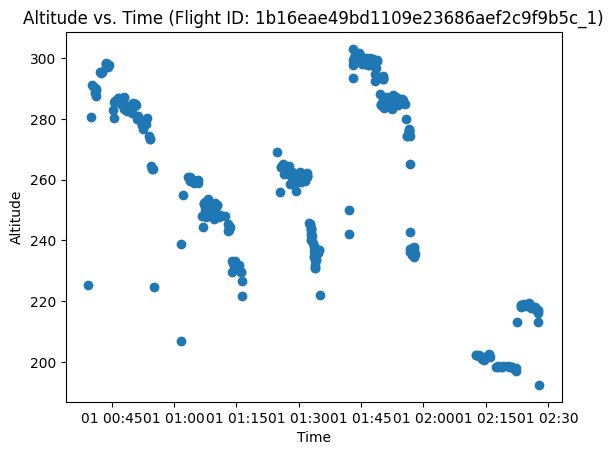

count                              308
mean     2023-05-01 09:32:14.188311808
min                2023-05-01 09:11:10
25%         2023-05-01 09:22:05.500000
50%         2023-05-01 09:33:55.500000
75%                2023-05-01 09:42:22
max                2023-05-01 09:49:43
Name: SensorTime, dtype: object


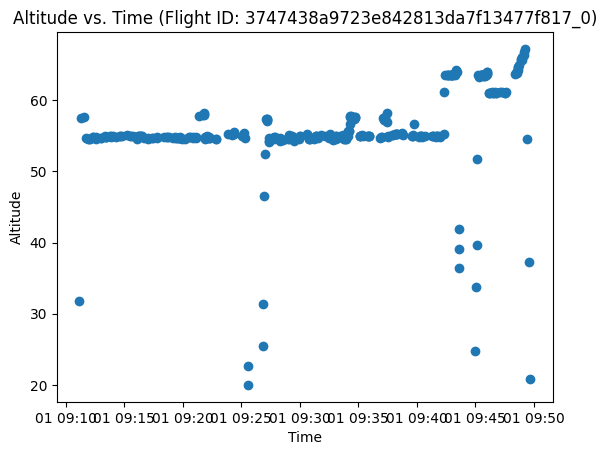

count                              332
mean     2023-05-01 00:22:24.012048128
min                2023-05-01 00:16:43
25%      2023-05-01 00:20:15.750000128
50%                2023-05-01 00:22:15
75%                2023-05-01 00:24:43
max                2023-05-01 00:29:07
Name: SensorTime, dtype: object


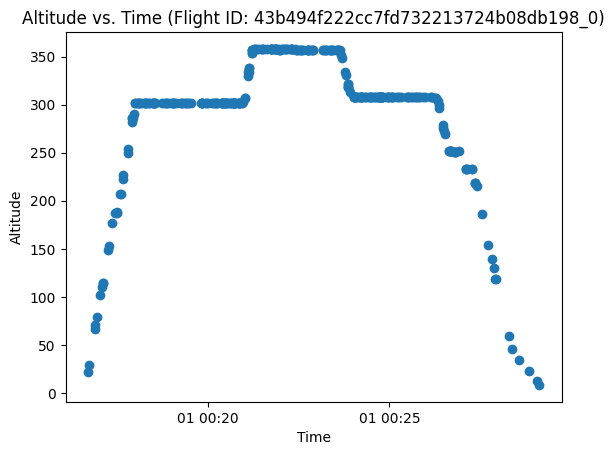

count                              274
mean     2023-05-01 06:00:27.492700928
min                2023-05-01 05:51:52
25%      2023-05-01 05:54:11.750000128
50%                2023-05-01 06:00:45
75%      2023-05-01 06:07:23.750000128
max                2023-05-01 06:09:36
Name: SensorTime, dtype: object


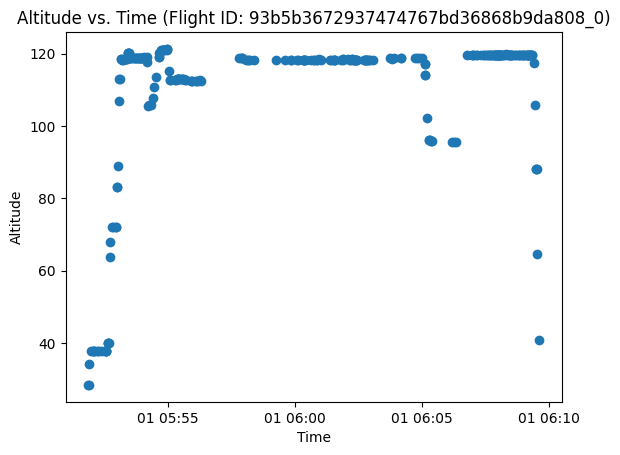

count                              135
mean     2023-05-01 10:47:14.888888832
min                2023-05-01 10:40:49
25%         2023-05-01 10:44:04.500000
50%                2023-05-01 10:47:50
75%                2023-05-01 10:49:56
max                2023-05-01 11:00:30
Name: SensorTime, dtype: object


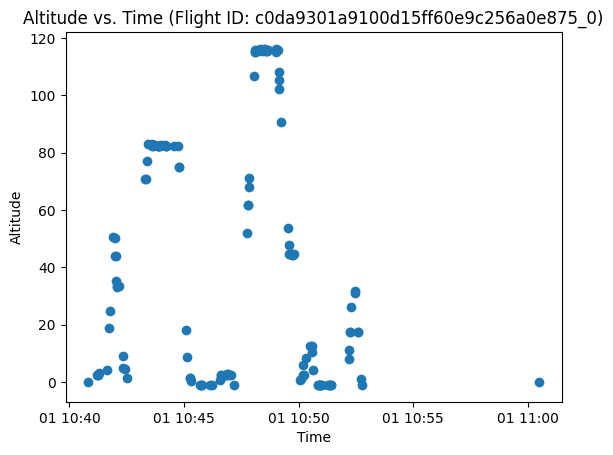

count                              366
mean     2023-05-01 11:30:29.054644480
min                2023-05-01 11:22:30
25%      2023-05-01 11:26:10.249999872
50%         2023-05-01 11:28:58.500000
75%      2023-05-01 11:36:41.249999872
max                2023-05-01 11:38:33
Name: SensorTime, dtype: object


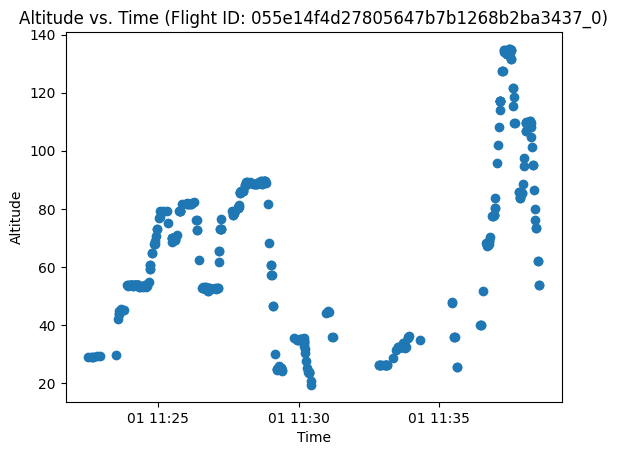

count                              119
mean     2023-05-01 09:47:26.126049792
min                2023-05-01 09:36:24
25%         2023-05-01 09:41:54.500000
50%                2023-05-01 09:45:36
75%                2023-05-01 09:53:27
max                2023-05-01 09:59:08
Name: SensorTime, dtype: object


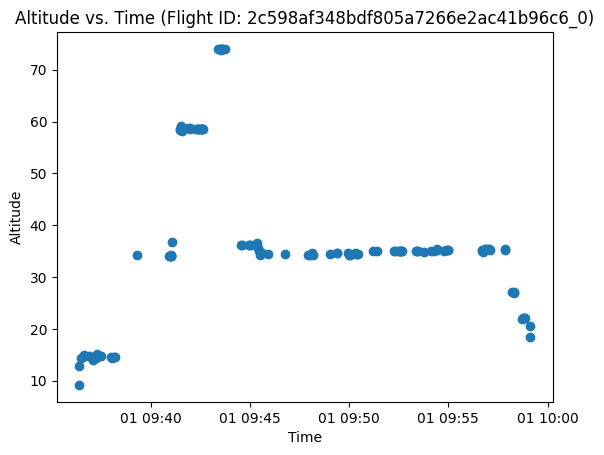

count                              267
mean     2023-05-01 11:45:11.022472192
min                2023-05-01 11:18:06
25%                2023-05-01 11:28:16
50%                2023-05-01 11:47:15
75%                2023-05-01 11:57:49
max                2023-05-01 12:08:55
Name: SensorTime, dtype: object


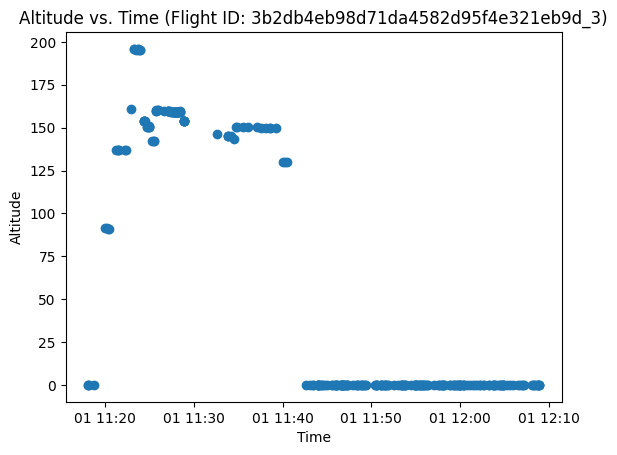

count                              149
mean     2023-05-01 07:20:12.362416128
min                2023-05-01 07:14:38
25%                2023-05-01 07:17:16
50%                2023-05-01 07:20:11
75%                2023-05-01 07:23:06
max                2023-05-01 07:26:07
Name: SensorTime, dtype: object


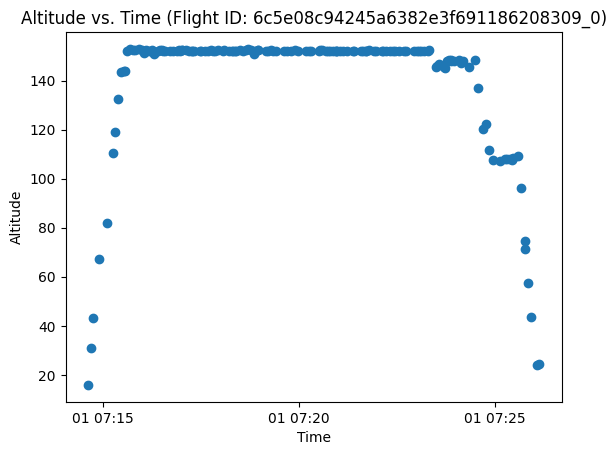

count                              103
mean     2023-05-01 11:34:19.699028736
min                2023-05-01 11:10:40
25%                2023-05-01 11:22:12
50%                2023-05-01 11:36:06
75%                2023-05-01 11:41:41
max                2023-05-01 12:05:19
Name: SensorTime, dtype: object


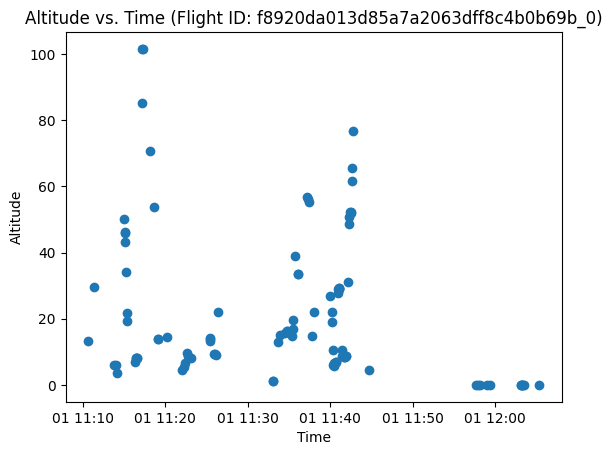

count                              393
mean     2023-05-01 08:36:54.231552256
min                2023-05-01 08:19:05
25%                2023-05-01 08:27:33
50%                2023-05-01 08:35:58
75%                2023-05-01 08:47:39
max                2023-05-01 08:55:14
Name: SensorTime, dtype: object


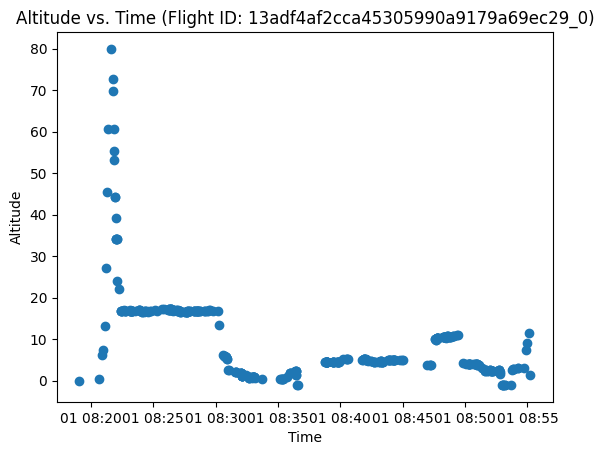

count                              604
mean     2023-05-01 07:38:47.266556416
min                2023-05-01 07:19:00
25%      2023-05-01 07:29:07.249999872
50%                2023-05-01 07:39:59
75%                2023-05-01 07:46:56
max                2023-05-01 07:58:33
Name: SensorTime, dtype: object


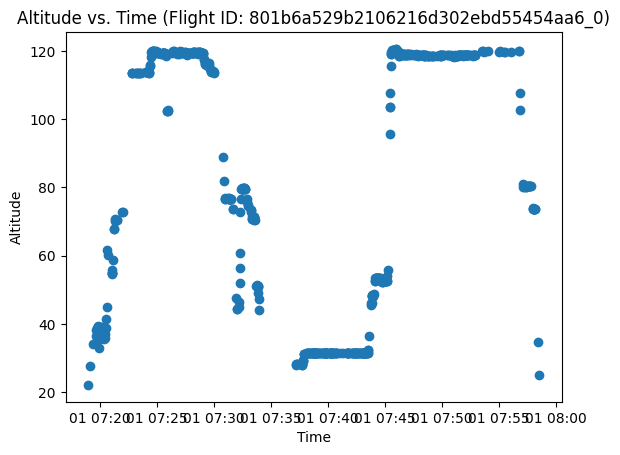

count                              319
mean     2023-05-01 10:01:46.034482688
min                2023-05-01 09:54:22
25%                2023-05-01 09:57:02
50%                2023-05-01 09:58:59
75%                2023-05-01 10:00:57
max                2023-05-01 10:23:22
Name: SensorTime, dtype: object


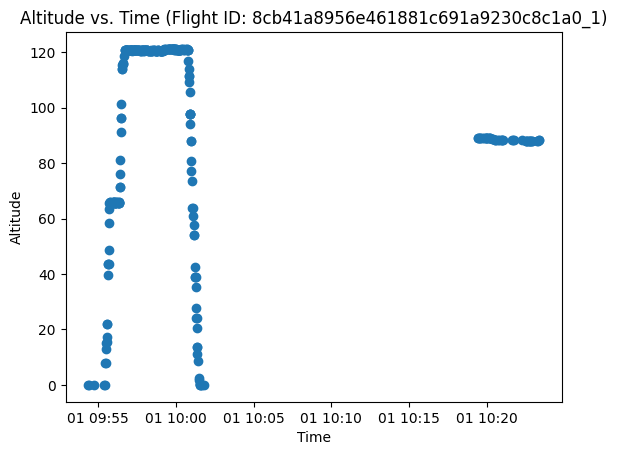

count                              268
mean     2023-05-01 03:18:16.839552256
min                2023-05-01 03:06:45
25%                2023-05-01 03:11:38
50%         2023-05-01 03:15:05.500000
75%      2023-05-01 03:25:24.750000128
max                2023-05-01 03:34:20
Name: SensorTime, dtype: object


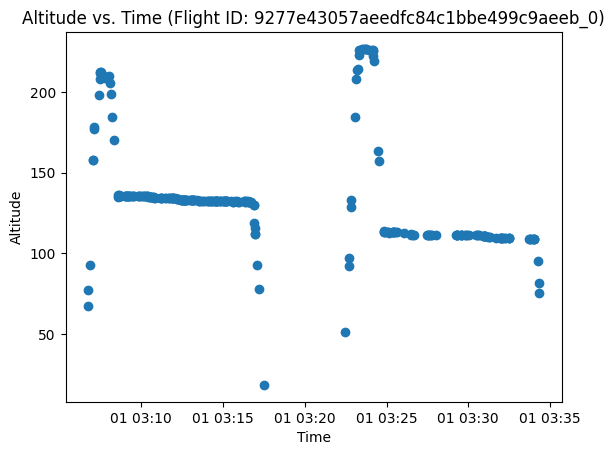

count                           125
mean     2023-05-01 08:56:31.824000
min             2023-05-01 08:43:33
25%             2023-05-01 08:53:43
50%             2023-05-01 08:56:16
75%             2023-05-01 09:00:37
max             2023-05-01 09:02:31
Name: SensorTime, dtype: object


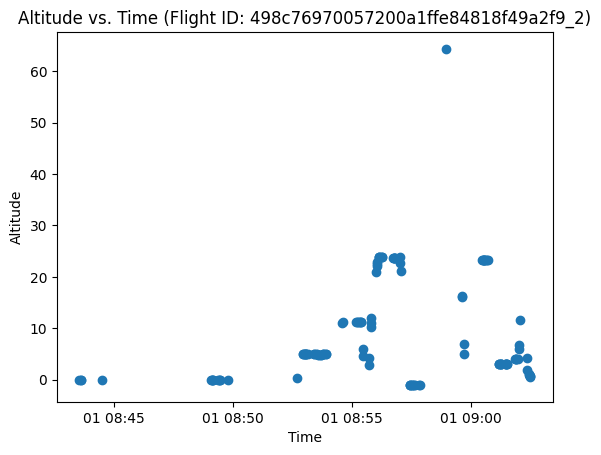

count                              130
mean     2023-05-01 11:26:33.246153984
min                2023-05-01 11:22:11
25%      2023-05-01 11:23:55.249999872
50%                2023-05-01 11:26:43
75%      2023-05-01 11:28:45.249999872
max                2023-05-01 11:31:46
Name: SensorTime, dtype: object


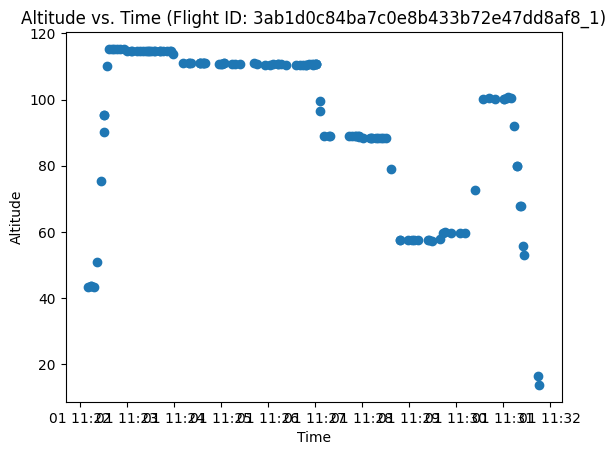

count                              549
mean     2023-05-01 12:01:25.074681344
min                2023-05-01 11:47:57
25%                2023-05-01 11:53:15
50%                2023-05-01 11:57:52
75%                2023-05-01 12:10:26
max                2023-05-01 12:15:31
Name: SensorTime, dtype: object


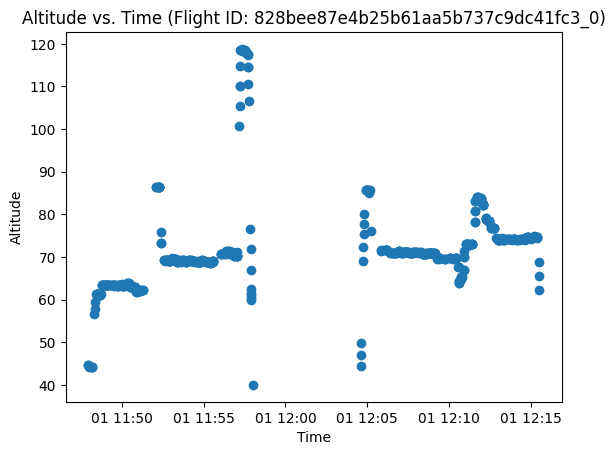

count                              102
mean     2023-05-01 07:19:59.225490176
min                2023-05-01 07:08:53
25%      2023-05-01 07:11:15.249999872
50%         2023-05-01 07:23:47.500000
75%      2023-05-01 07:26:11.249999872
max                2023-05-01 07:36:45
Name: SensorTime, dtype: object


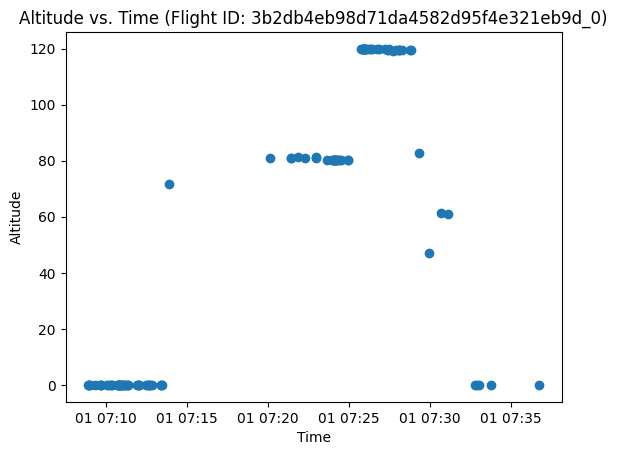

count                              486
mean     2023-05-01 06:04:55.528806656
min                2023-05-01 05:54:14
25%         2023-05-01 05:59:45.500000
50%                2023-05-01 06:04:55
75%      2023-05-01 06:10:14.750000128
max                2023-05-01 06:15:19
Name: SensorTime, dtype: object


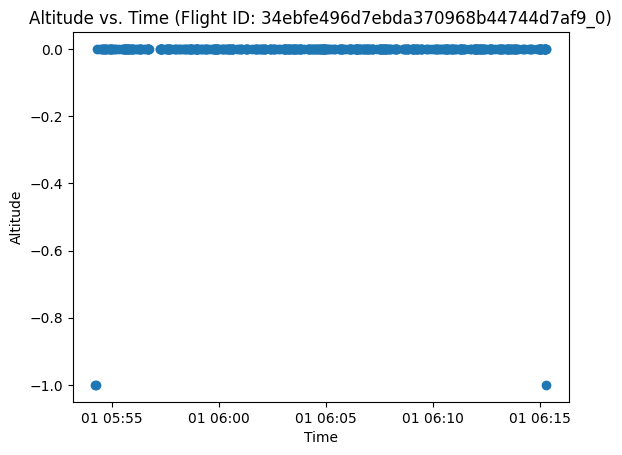

count                              137
mean     2023-05-01 00:38:14.613138432
min                2023-05-01 00:33:11
25%                2023-05-01 00:33:23
50%                2023-05-01 00:35:02
75%                2023-05-01 00:42:48
max                2023-05-01 00:44:59
Name: SensorTime, dtype: object


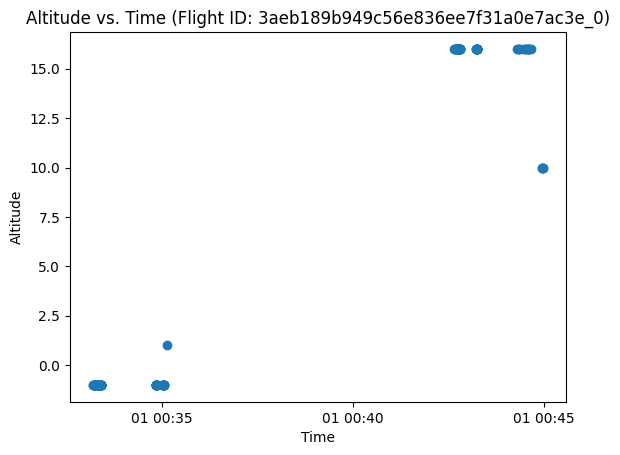

count                              108
mean     2023-05-01 09:49:25.398148352
min                2023-05-01 09:43:50
25%      2023-05-01 09:46:15.750000128
50%                2023-05-01 09:48:23
75%      2023-05-01 09:52:41.249999872
max                2023-05-01 09:55:46
Name: SensorTime, dtype: object


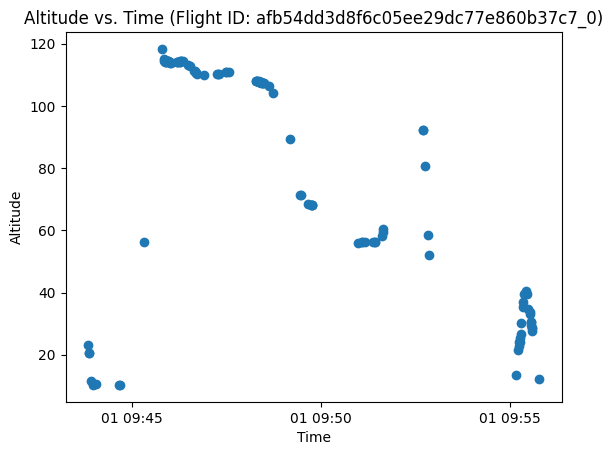

count                              277
mean     2023-05-01 11:45:08.801444096
min                2023-05-01 11:09:53
25%                2023-05-01 11:26:45
50%                2023-05-01 11:52:16
75%                2023-05-01 12:02:40
max                2023-05-01 12:09:21
Name: SensorTime, dtype: object


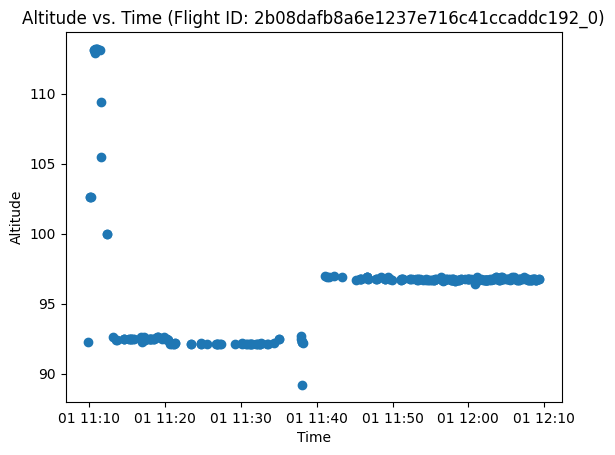

count                              169
mean     2023-05-01 08:08:49.875739648
min                2023-05-01 08:04:13
25%                2023-05-01 08:06:33
50%                2023-05-01 08:08:37
75%                2023-05-01 08:11:27
max                2023-05-01 08:14:03
Name: SensorTime, dtype: object


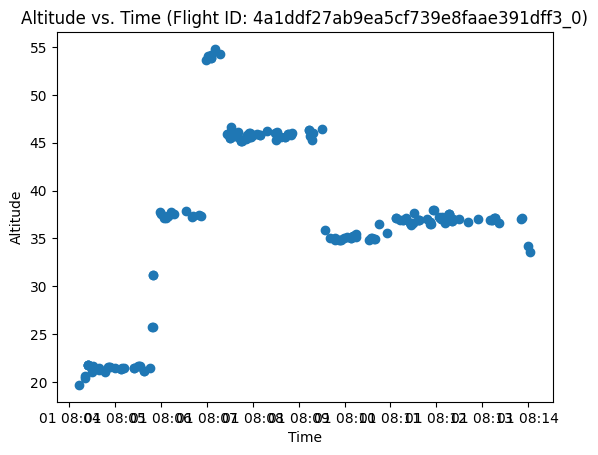

count                              501
mean     2023-05-01 12:00:08.457085696
min                2023-05-01 11:49:41
25%                2023-05-01 11:55:25
50%                2023-05-01 12:00:18
75%                2023-05-01 12:04:48
max                2023-05-01 12:11:24
Name: SensorTime, dtype: object


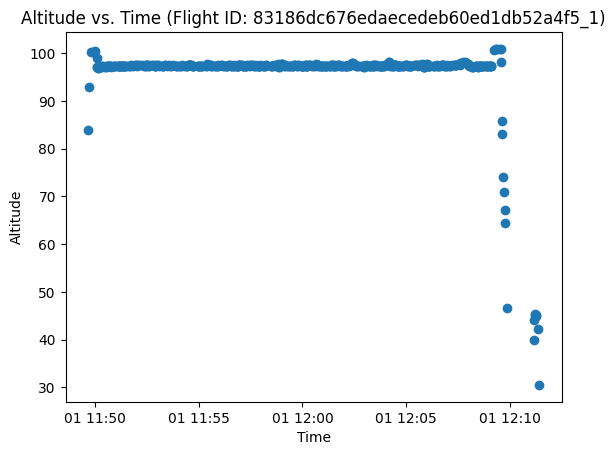

count                              191
mean     2023-05-01 09:50:56.125654528
min                2023-05-01 09:22:44
25%                2023-05-01 09:34:13
50%                2023-05-01 09:44:00
75%         2023-05-01 10:05:18.500000
max                2023-05-01 10:35:32
Name: SensorTime, dtype: object


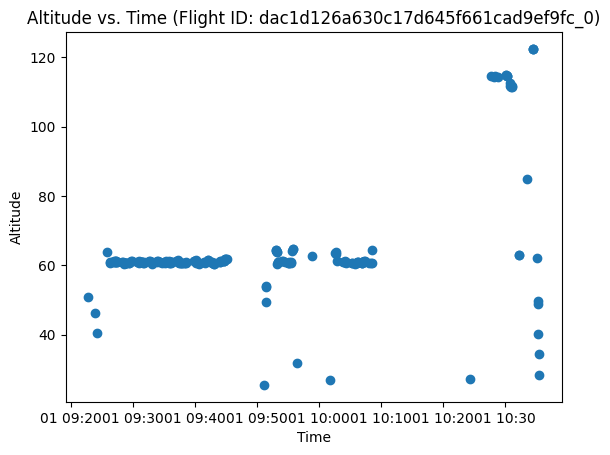

count                              106
mean     2023-05-01 11:02:16.358490624
min                2023-05-01 10:58:51
25%                2023-05-01 11:01:45
50%         2023-05-01 11:02:30.500000
75%      2023-05-01 11:03:14.750000128
max                2023-05-01 11:03:50
Name: SensorTime, dtype: object


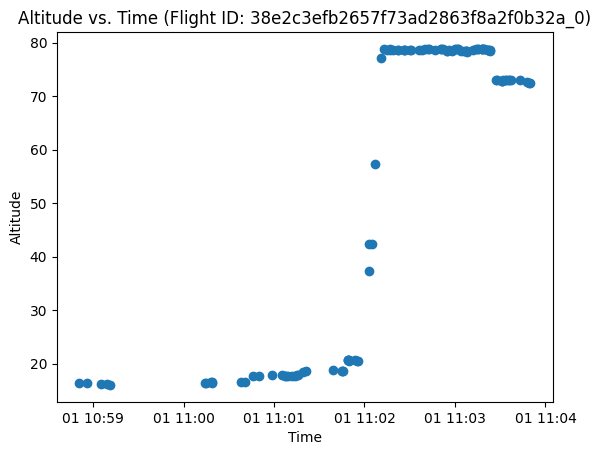

count                              271
mean     2023-05-01 06:55:36.169741312
min                2023-05-01 06:50:32
25%         2023-05-01 06:53:23.500000
50%                2023-05-01 06:56:20
75%         2023-05-01 06:57:53.500000
max                2023-05-01 07:01:08
Name: SensorTime, dtype: object


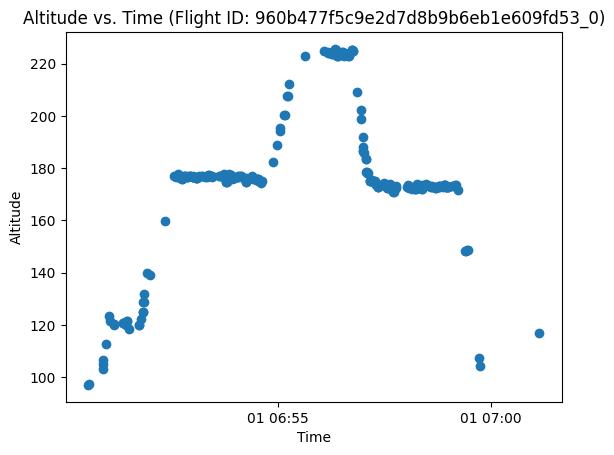

count                             2085
mean     2023-05-01 00:42:02.198561280
min                2023-05-01 00:11:49
25%                2023-05-01 00:23:22
50%                2023-05-01 00:44:05
75%                2023-05-01 00:58:25
max                2023-05-01 01:10:42
Name: SensorTime, dtype: object


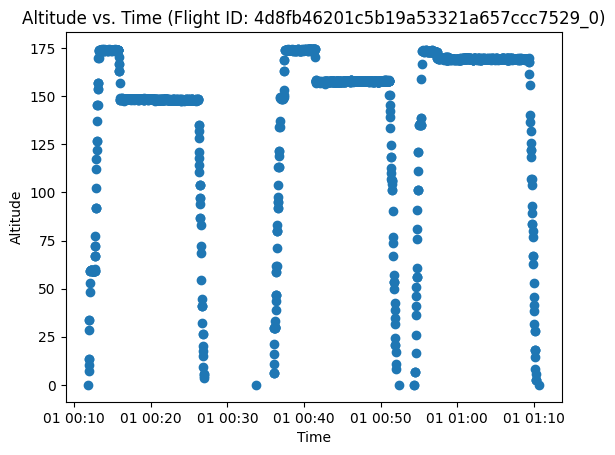

count                              124
mean     2023-05-01 00:58:36.370967808
min                2023-05-01 00:50:54
25%      2023-05-01 00:55:29.750000128
50%         2023-05-01 00:58:50.500000
75%                2023-05-01 01:01:45
max                2023-05-01 01:05:06
Name: SensorTime, dtype: object


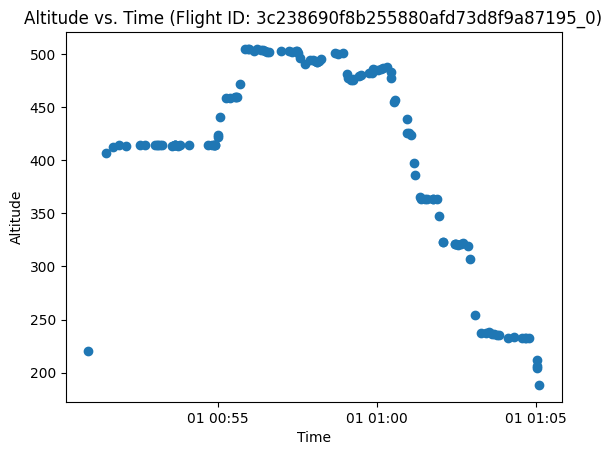

count                              174
mean     2023-05-01 12:04:25.862068736
min                2023-05-01 11:59:05
25%         2023-05-01 12:02:21.500000
50%         2023-05-01 12:04:20.500000
75%         2023-05-01 12:06:33.500000
max                2023-05-01 12:08:50
Name: SensorTime, dtype: object


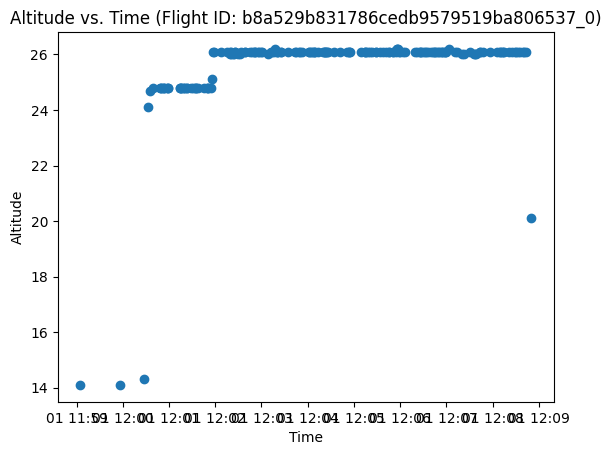

count                              102
mean               2023-05-01 11:29:15
min                2023-05-01 11:25:48
25%                2023-05-01 11:27:25
50%         2023-05-01 11:29:39.500000
75%      2023-05-01 11:31:05.249999872
max                2023-05-01 11:32:21
Name: SensorTime, dtype: object


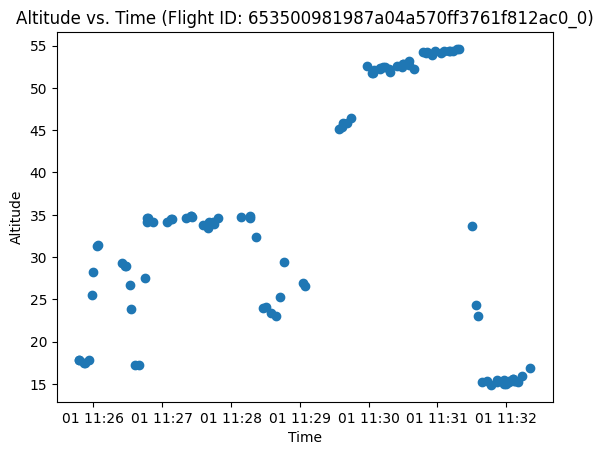

count                              150
mean     2023-05-01 07:08:03.026666752
min                2023-05-01 06:58:11
25%                2023-05-01 07:03:38
50%         2023-05-01 07:07:31.500000
75%      2023-05-01 07:10:40.249999872
max                2023-05-01 07:20:14
Name: SensorTime, dtype: object


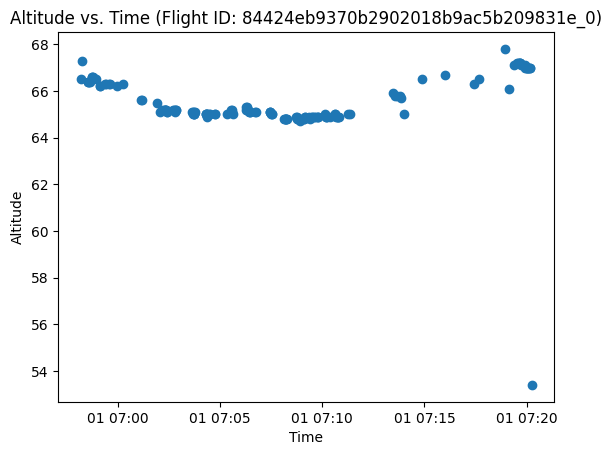

count                              565
mean     2023-05-01 08:25:24.355752192
min                2023-05-01 08:11:36
25%                2023-05-01 08:21:29
50%                2023-05-01 08:25:19
75%                2023-05-01 08:30:22
max                2023-05-01 08:37:00
Name: SensorTime, dtype: object


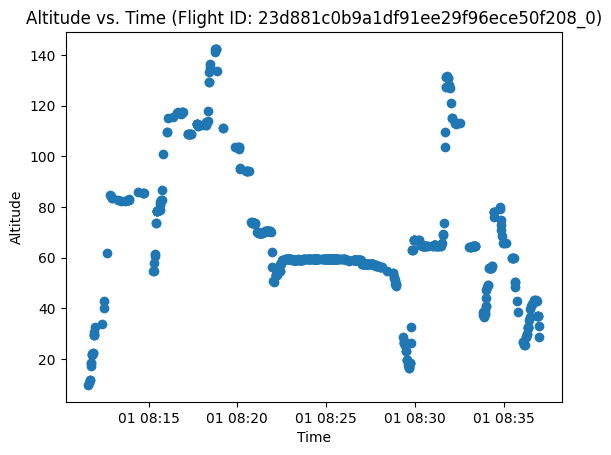

count                              193
mean     2023-05-01 10:06:03.305699584
min                2023-05-01 10:01:18
25%                2023-05-01 10:03:19
50%                2023-05-01 10:06:01
75%                2023-05-01 10:08:38
max                2023-05-01 10:11:14
Name: SensorTime, dtype: object


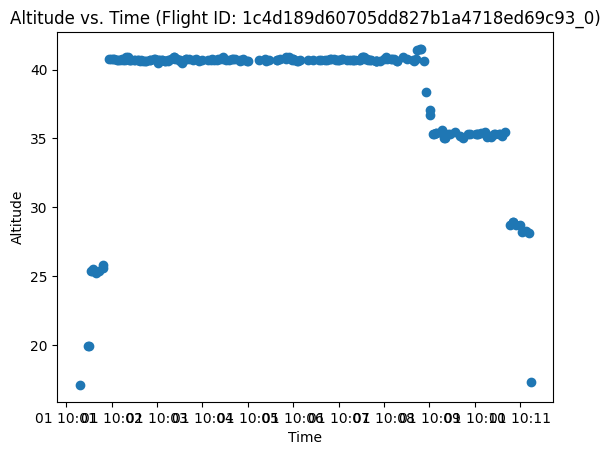

count                              204
mean     2023-05-01 08:09:01.980391936
min                2023-05-01 08:03:07
25%         2023-05-01 08:06:01.500000
50%                2023-05-01 08:08:52
75%      2023-05-01 08:11:49.249999872
max                2023-05-01 08:14:45
Name: SensorTime, dtype: object


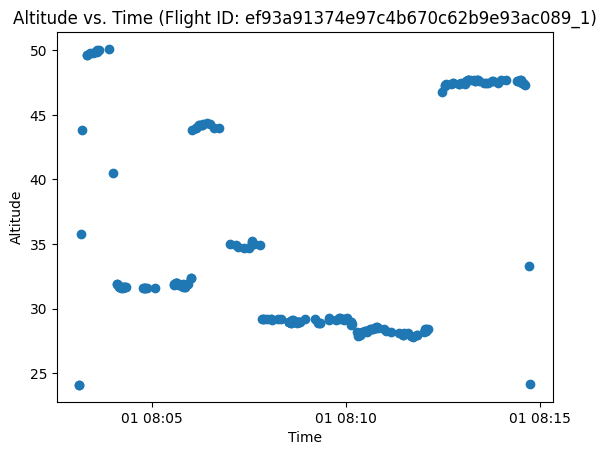

count                              242
mean     2023-05-01 12:11:49.760330496
min                2023-05-01 11:46:30
25%      2023-05-01 11:56:01.750000128
50%                2023-05-01 12:10:18
75%                2023-05-01 12:25:00
max                2023-05-01 12:40:45
Name: SensorTime, dtype: object


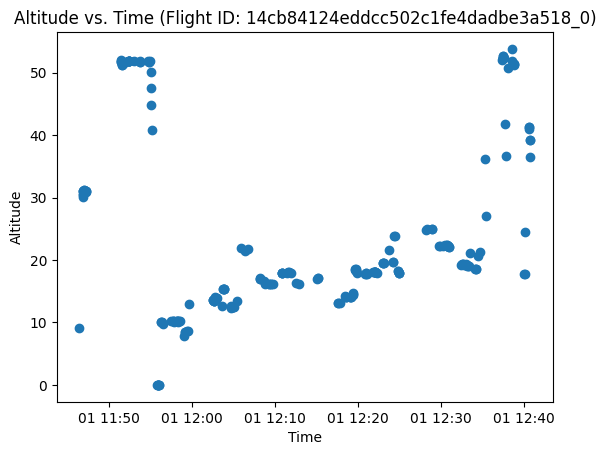

count                              215
mean     2023-05-01 09:22:34.613953536
min                2023-05-01 09:16:42
25%         2023-05-01 09:19:51.500000
50%                2023-05-01 09:22:15
75%                2023-05-01 09:25:34
max                2023-05-01 09:28:42
Name: SensorTime, dtype: object


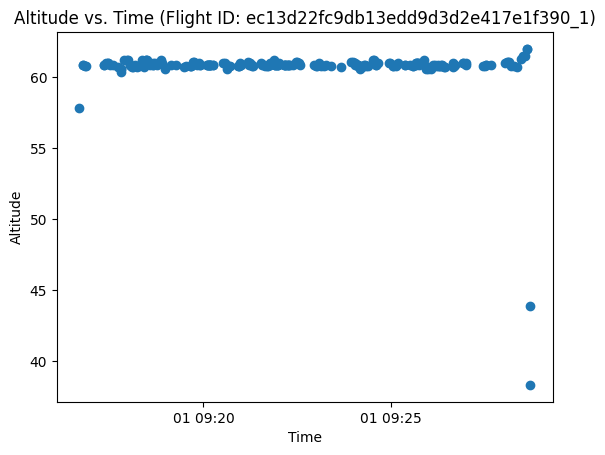

count                              102
mean     2023-05-01 11:22:14.901960448
min                2023-05-01 11:21:21
25%                2023-05-01 11:21:47
50%                2023-05-01 11:22:13
75%         2023-05-01 11:22:40.500000
max                2023-05-01 11:23:13
Name: SensorTime, dtype: object


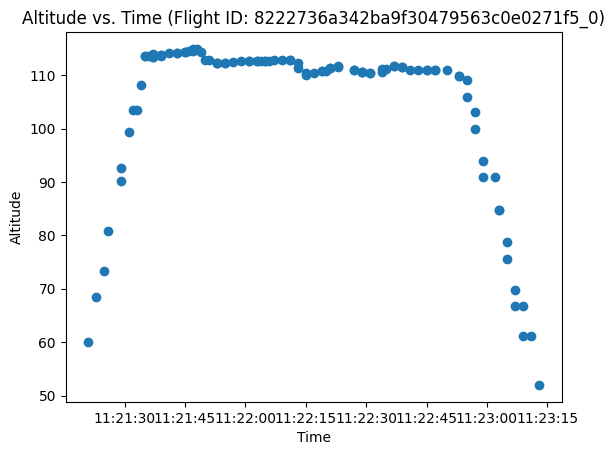

count                              114
mean     2023-05-01 07:28:13.192982528
min                2023-05-01 07:17:26
25%                2023-05-01 07:22:07
50%         2023-05-01 07:28:25.500000
75%      2023-05-01 07:34:33.750000128
max                2023-05-01 07:37:11
Name: SensorTime, dtype: object


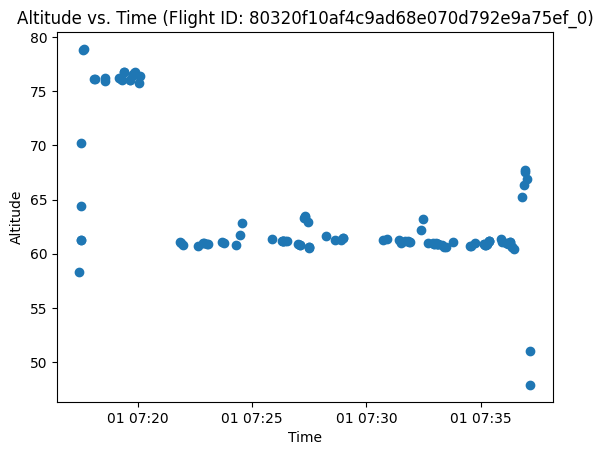

count                             1662
mean     2023-05-01 11:02:11.765342976
min                2023-05-01 10:20:54
25%                2023-05-01 10:32:53
50%                2023-05-01 11:07:32
75%         2023-05-01 11:29:32.500000
max                2023-05-01 11:51:54
Name: SensorTime, dtype: object


KeyboardInterrupt: 

In [35]:
# Loop through each flight ID
flight_ids = df['UniqueFlightId'].unique()

for flight_id in flight_ids:
    # Filter the dataframe for the current flight ID
    filtered_df_flight = df[df['UniqueFlightId'] == flight_id]

    if len(filtered_df_flight) < 100:
        df = df.drop(filtered_df_flight.index)
        continue

    # Describe the SensorTime column
    print(filtered_df_flight['SensorTime'].describe())

    # Plot the time series data with color based on FlightId
    plt.scatter(filtered_df_flight['DetectionLatitude'], filtered_df_flight['DetectionLongitude'], c=filtered_df_flight['Altitude'], cmap='viridis', s=10)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Altitude vs. Time (Flight ID: {flight_id})')
    plt.show()

print(len(df['UniqueFlightId'].unique()))

In [33]:
# save the df to a new csv file
df.to_csv('labeled_flight_data_sample.csv', index=False)

In [ ]:
# Create synthetic noisy data based on existing flight paths
# Loop through a random sample of flight IDs
flight_ids = np.random.choice(df['UniqueFlightId'].unique(), 5)
for flight_id in flight_ids:
    # Filter the dataframe for the current flight ID
    filtered_df_flight = df[df['UniqueFlightId'] == flight_id]

    # Get the unique timestamps and corresponding altitude values
    timestamps = filtered_df_flight['SensorTime'].values
    altitudes = filtered_df_flight['Altitude'].values

    # Create a new dataframe with synthetic noisy data
    num_points = len(timestamps)
    timestamps_noisy = timestamps + np.random.normal(0, 1, num_points) * np.timedelta64(1, 'm')
    altitudes_noisy = altitudes + np.random.normal(0, 1, num_points)

    # Create a new dataframe with synthetic noisy data
    df_noisy = pd.DataFrame({'SensorTime': timestamps_noisy, 'Altitude': altitudes_noisy})

    # Plot the original and noisy data
    plt.scatter(filtered_df_flight['SensorTime'], filtered_df_flight['Altitude'], label='Original')
    plt.scatter(df_noisy['SensorTime'], df_noisy['Altitude'], label='Noisy')
    plt.xlabel('Time')
    plt.ylabel('Altitude')
    plt.title(f'Altitude vs. Time (Flight ID: {flight_id})')
    plt.legend()
    plt.show()


In [ ]:
# Create a point cloud object
point_cloud = o3d.geometry.PointCloud()

# Set the point cloud coordinates
point_cloud.points = o3d.utility.Vector3dVector(df[['DetectionLatitude', 'DetectionLongitude', 'Altitude']].values)

# Visualize the point cloud
o3d.visualization.draw_geometries([point_cloud])